In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import sys
import os
import gc
import tqdm
from tqdm import notebook
import itertools

tqbar=tqdm.notebook.tqdm

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import bokeh

import plotly as ply
from plotly.subplots import make_subplots
from plotly import graph_objs as go
ply.io.renderers.default="notebook" #"colab"

import analysis_functions

In [2]:
indexedSimulationData=pd.read_csv('Simulation_Milestone_Coordinate_Data.cAMP_newTransit.csv')
indexedSimulationData.head()

Window  Rep  Time  Rst06_X  Rst06_Y  Rst07_Z  Rst08_Z  X_Index          R
0       0    1     0    4.291   17.350  107.903   10.456        0  17.872750
1       0    1   500    4.117   17.984  108.105   10.275        0  18.449226
2       0    1  1000    4.162   17.821  108.509    9.857        0  18.300554
3       0    1  1500    4.621   17.773  107.792   10.539        0  18.363909
4       0    1  2000    4.761   17.909  108.495    9.874        0  18.531039

In [3]:
milestoneData=analysis_functions.add_indexed_milestoning_analysis_columns(
    indexedSimulationData,
    windowColumn='Window',xIndexColumn='X_Index',frameCol='Frame',
    repColumn='Rep',groupingColumn=None,verbose=True,
    verboseLevel=0
)
milestoneData.head()

/Users/wbotellosmith/Documents/Connexin/cx26_milestoning_convergence_testing/analysis_functions.py:424: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/wbotellosmith/Documents/Connexin/cx26_milestoning_convergence_testing/analysis_functions.py:434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/wbotellosmith/Documents/Connexin/cx26_milestoning_convergence_testing/analysis_functions.py:439: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

--- --- --- Grouping Name: 0 --- --- ---
	--- --- Window Name: 0 --- ---
		--- Replica Name: 1 2 3 4 5 

/Users/wbotellosmith/Documents/Connexin/cx26_milestoning_convergence_testing/analysis_functions.py:490: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/wbotellosmith/Documents/Connexin/cx26_milestoning_convergence_testing/analysis_functions.py:497: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6 ---
	--- --- ------ --- ---
	--- --- Window Name: 1 --- ---
		--- Replica Name: 1 2 3 4 5 6 7 8 ---
	--- --- ------ --- ---
	--- --- Window Name: 2 --- ---
		--- Replica Name: 1 3 4 5 6 7 8 9 10 11 12 13 ---
	--- --- ------ --- ---
	--- --- Window Name: 3 --- ---
		--- Replica Name: 1 2 3 4 5 ---
	--- --- ------ --- ---
	--- --- Window Name: 4 --- ---
		--- Replica Name: 2 4 5 6 7 8 9 ---
	--- --- ------ --- ---
	--- --- Window Name: 5 --- ---
		--- Replica Name: 1 3 4 5 6 7 ---
	--- --- ------ --- ---
	--- --- Window Name: 6 --- ---
		--- Replica Name: 1 3 4 5 6 7 8 9 10 ---
	--- --- ------ --- ---
	--- --- Window Name: 7 --- ---
		--- Replica Name: 2 4 5 6 7 8 9 10 ---
	--- --- ------ --- ---
	--- --- Window Name: 8 --- ---
		--- Replica Name: 1 3 4 5 6 7 8 9 10 11 ---
	--- --- ------ --- ---
	--- --- Window Name: 9 --- ---
		--- Replica Name: 6 7 8 9 10 11 12 13 ---
	--- --- ------ --- ---
	--- --- Window Name: 10 --- ---
		--- Replica Name: 1 2 3 4 5 6 7 8 9 10 11 ---
	--- --- --

Window  X_Index  Group  Rep  Frame  Escape_Vector  Reentry_Vector
0       0        0      0    1      0              0              -1
1       0        0      0    1      1              0              -1
2       0        0      0    1      2              0              -1
3       0        0      0    1      3              0              -1
4       0        0      0    1      4              0              -1

In [4]:
countGroups=milestoneData[['Group','Rep','Window','Frame','Escape_Vector']].groupby(
    ['Group','Rep','Window'])

countFrames=[]
for countGroup in tqbar(countGroups):
    countGroupName,countGroupData=countGroup
    
    countFrame=countGroupData.copy()
    countFrame['Cumulative_Time']=(countFrame['Escape_Vector']>=0).cumsum()
    countFrame['FrameNumber']=np.arange(len(countFrame))
    countFrames.append(countFrame)
countFrame=pd.concat(countFrames)
countFrame.head()

Group  Rep  Window  Frame  Escape_Vector  Cumulative_Time  FrameNumber
0      0    1       0      0              0                1            0
1      0    1       0      1              0                2            1
2      0    1       0      2              0                3            2
3      0    1       0      3              0                4            3
4      0    1       0      4              0                5            4

Group  Rep  Window  Frame  Escape_Vector  Cumulative_Time  FrameNumber
0      0    1       0      0              0                1            0
1      0    1       0      1              0                2            1
2      0    1       0      2              0                3            2
3      0    1       0      3              0                4            3
4      0    1       0      4              0                5            4

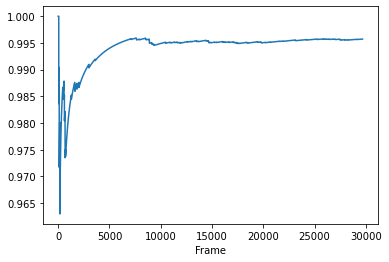

In [5]:
testDat=countFrame.query(
    '(Group==0) and (Rep==1) and (Window==0)'
)
display(testDat.head())
sns.lineplot(x=testDat.Frame,y=testDat.Cumulative_Time/(testDat.Frame+1.))
plt.show()

In [6]:
groupCol='Group'
windowCol='Window'
repCol='Rep'
timeCol='Frame'
groupingColumns=[groupCol,windowCol,repCol]
convergenceGroupings=milestoneData.groupby(groupingColumns)

Ri_frames=[]
Nij_frames=[]

milestoneBins=np.sort(np.unique(np.concatenate(
    [milestoneData['Window'].to_numpy(),milestoneData['X_Index'].to_numpy()]
)))
binMapFrame=pd.DataFrame({
    'binInd':np.arange(len(milestoneBins)),
    'binName':milestoneBins
})

with tqbar(convergenceGroupings) as gbar:
    for convergenceGroup in gbar:
        convergenceGroupName,convergenceGroupData=convergenceGroup
        
        binIndToName=binMapFrame.set_index('binName')
        binNameToInd=binMapFrame.set_index('binInd')
        
        countData=convergenceGroupData.sort_values(timeCol)
        
        ReentryVector=countData[
            [timeCol,'Reentry_Vector']
        ].set_index(timeCol)['Reentry_Vector']
        EscapeVector=countData[
            [timeCol,'Escape_Vector']
        ].set_index(timeCol)['Escape_Vector']
        
        Ri_array=np.array(
            [
                (
                    ReentryVector==binName
                ).cumsum() for binInd,binName in binMapFrame[['binInd','binName']].to_numpy()
            ],
            dtype=int
        )
        
        Nij_array=np.array(
            [
                [
                    (
                        (ReentryVector==binName_i) * \
                        (EscapeVector==binName_j)
                    ).cumsum() for binInd_j,binName_j in binMapFrame[['binInd','binName']].to_numpy()
                ] for binInd_i,binName_i in binMapFrame[['binInd','binName']].to_numpy()
            ],
            dtype=int
        )
        
        Ri_nzInds=np.nonzero(Ri_array) #(binNames,Frames)
        Ri_Frame=pd.DataFrame({
            'Group':[convergenceGroupName[0]]*len(Ri_nzInds[0]),
            'Window':[convergenceGroupName[1]]*len(Ri_nzInds[0]),
            'Rep':[convergenceGroupName[2]]*len(Ri_nzInds[0]),
            'Frame':Ri_nzInds[1],
            'BinName':Ri_nzInds[0],
            'Cumulative_Count':Ri_array[Ri_nzInds]
        })
        Ri_frames.append(Ri_Frame.copy())
        
        Nij_nzInds=np.nonzero(Nij_array) #(binNames_i,binNames_j,Frames)
        Nij_Frame=pd.DataFrame({
            'Group':[convergenceGroupName[0]]*len(Nij_nzInds[0]),
            'Window':[convergenceGroupName[1]]*len(Nij_nzInds[0]),
            'Rep':[convergenceGroupName[2]]*len(Nij_nzInds[0]),
            'Frame':Nij_nzInds[2],
            'BinName_i':Nij_nzInds[0],
            'BinName_j':Nij_nzInds[1],
            'Cumulative_Count':Nij_array[Nij_nzInds]
        })
        Nij_frames.append(Nij_Frame.copy())
        
Ri_Frame=pd.concat(Ri_frames)
print('Ri alpha Convergence Data Frame')
display(Ri_Frame.head())
Nij_Frame=pd.concat(Nij_frames)
print('Nij alpha Convergence Data Frame')
display(Nij_Frame)

/Users/wbotellosmith/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:177: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead




Ri alpha Convergence Data Frame


Group  Window  Rep  Frame  BinName  Cumulative_Count
0      0       0    1     54        1                 1
1      0       0    1     55        1                 2
2      0       0    1     56        1                 3
3      0       0    1     57        1                 4
4      0       0    1     58        1                 5

Nij alpha Convergence Data Frame


Group  Window  Rep  Frame  BinName_i  BinName_j  Cumulative_Count
0          0       0    1     54          1          0                 1
1          0       0    1     55          1          0                 2
2          0       0    1     56          1          0                 3
3          0       0    1     57          1          0                 4
4          0       0    1     58          1          0                 5
...      ...     ...  ...    ...        ...        ...               ...
16496      0      52    5   8252         51         52              8008
16497      0      52    5   8253         51         52              8009
16498      0      52    5   8254         51         52              8010
16499      0      52    5   8255         51         52              8011
16500      0      52    5   8256         51         52              8012

[75608429 rows x 7 columns]

In [7]:
countFrame.head()

Group  Rep  Window  Frame  Escape_Vector  Cumulative_Time  FrameNumber
0      0    1       0      0              0                1            0
1      0    1       0      1              0                2            1
2      0    1       0      2              0                3            2
3      0    1       0      3              0                4            3
4      0    1       0      4              0                5            4

Group  Window  Rep  BinName_i  BinName_j  Cumulative_Count
Frame                                                            
502        0       1    1          2          0                 1
503        0       1    1          2          0                 1
504        0       1    1          2          0                 1
505        0       1    1          2          0                 1
506        0       1    1          2          0                 1

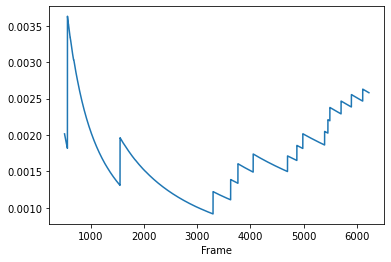

Group  Window  Rep  BinName  Cumulative_Count
Frame                                               
50         0       1    1        0                 1
51         0       1    1        0                 2
52         0       1    1        0                 3
53         0       1    1        0                 4
54         0       1    1        0                 5

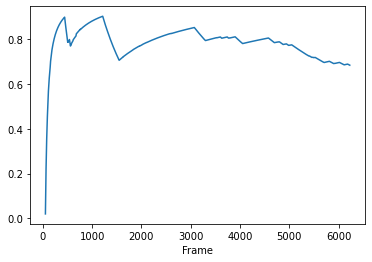

In [8]:
testDat_Nij=Nij_Frame.query(
    '(Group==0) and (Window==1) and (Rep==1) and (BinName_j==0) and (BinName_i==2)'
).set_index('Frame')
display(testDat_Nij.head())
testCount=countFrame.query(
    '(Group==0) and (Window==1) and (Rep==1)'
).set_index('Frame')

sns.lineplot(
    x=testDat_Nij.index,
    y=testDat_Nij.Cumulative_Count/countFrame.Cumulative_Time.loc[testDat_Nij.index])
plt.show()

testDat_Ri=Ri_Frame.query(
    '(Group==0) and (Window==1) and (Rep==1) and (BinName==0)'
).set_index('Frame')
display(testDat_Ri.head())
sns.lineplot(
    x=testDat_Ri.index,
    y=testDat_Ri.Cumulative_Count/countFrame.Cumulative_Time.loc[testDat_Ri.index])
plt.show()

In [9]:
display(Ri_Frame.head())
display(Nij_Frame.head())
display(countFrame.head())

Group  Window  Rep  Frame  BinName  Cumulative_Count
0      0       0    1     54        1                 1
1      0       0    1     55        1                 2
2      0       0    1     56        1                 3
3      0       0    1     57        1                 4
4      0       0    1     58        1                 5

Group  Window  Rep  Frame  BinName_i  BinName_j  Cumulative_Count
0      0       0    1     54          1          0                 1
1      0       0    1     55          1          0                 2
2      0       0    1     56          1          0                 3
3      0       0    1     57          1          0                 4
4      0       0    1     58          1          0                 5

Group  Rep  Window  Frame  Escape_Vector  Cumulative_Time  FrameNumber
0      0    1       0      0              0                1            0
1      0    1       0      1              0                2            1
2      0    1       0      2              0                3            2
3      0    1       0      3              0                4            3
4      0    1       0      4              0                5            4

In [10]:
Nij_Frame.to_csv('Nij_Data.csv',index=False)
Ri_Frame.to_csv('Ri_Data.csv',index=False)
countFrame.to_csv('Count_Data.csv',index=False)

In [11]:
Nij_Frame=pd.read_csv('Nij_Data.csv')
display(Nij_Frame.head())
Ri_Frame=pd.read_csv('Ri_Data.csv')
display(Ri_Frame.head())
countFrame=pd.read_csv('Count_Data.csv')
display(countFrame.head())

Group  Window  Rep  Frame  BinName_i  BinName_j  Cumulative_Count
0      0       0    1     54          1          0                 1
1      0       0    1     55          1          0                 2
2      0       0    1     56          1          0                 3
3      0       0    1     57          1          0                 4
4      0       0    1     58          1          0                 5

Group  Window  Rep  Frame  BinName  Cumulative_Count
0      0       0    1     54        1                 1
1      0       0    1     55        1                 2
2      0       0    1     56        1                 3
3      0       0    1     57        1                 4
4      0       0    1     58        1                 5

Group  Rep  Window  Frame  Escape_Vector  Cumulative_Time  FrameNumber
0      0    1       0      0              0                1            0
1      0    1       0      1              0                2            1
2      0    1       0      2              0                3            2
3      0    1       0      3              0                4            3
4      0    1       0      4              0                5            4

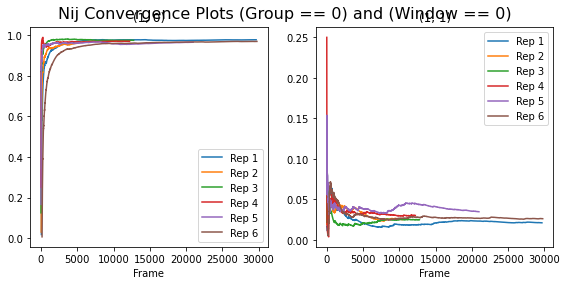

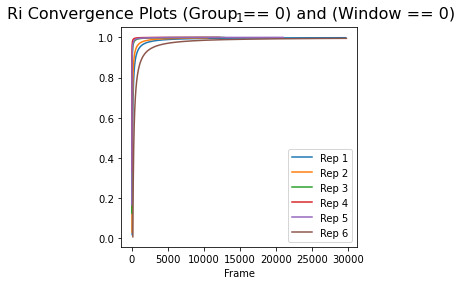

--- --- --- --- ---


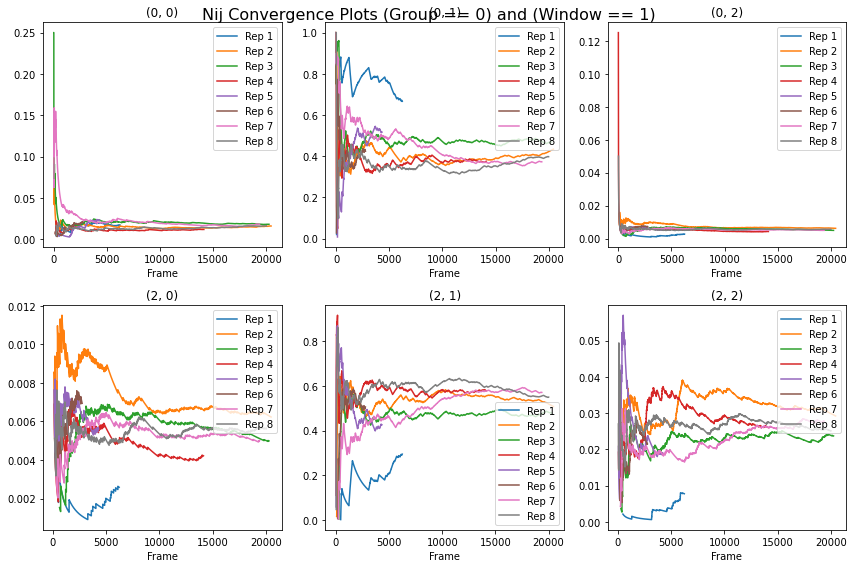

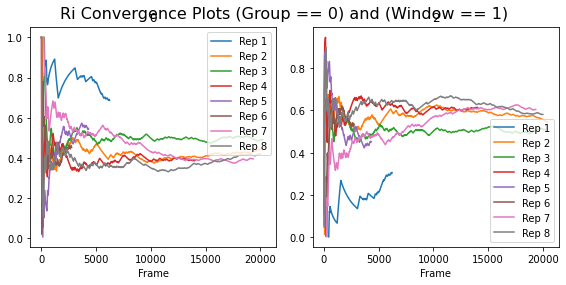

--- --- --- --- ---


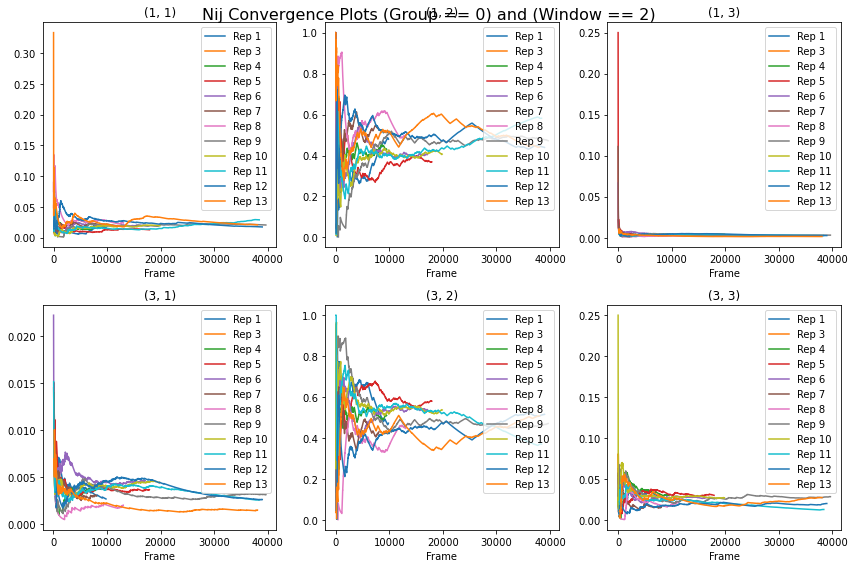

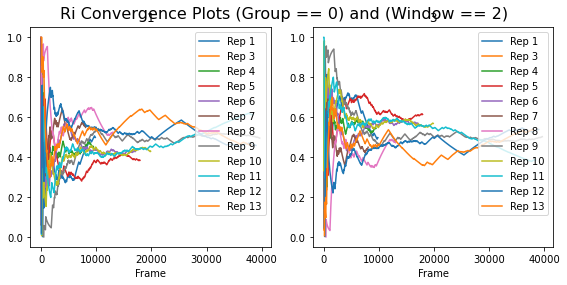

--- --- --- --- ---


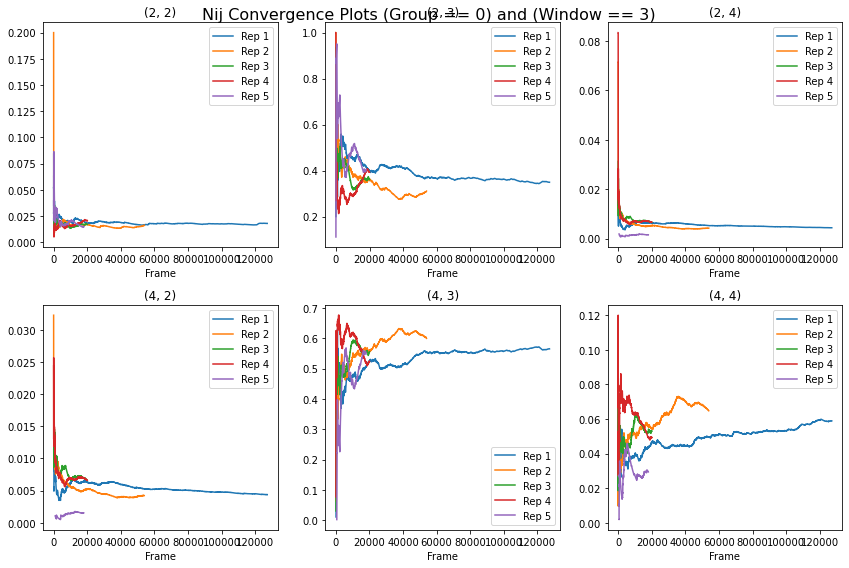

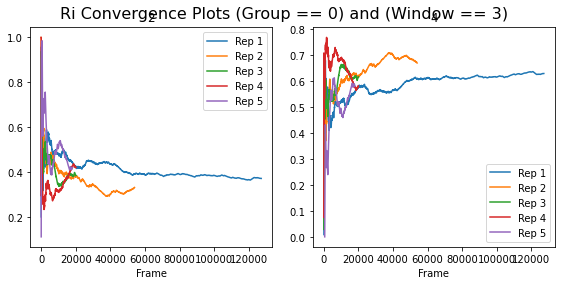

--- --- --- --- ---


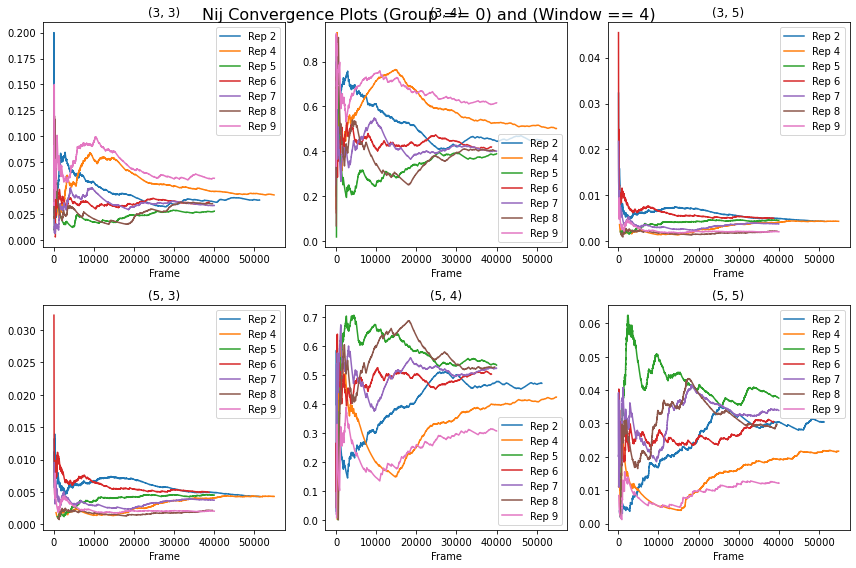

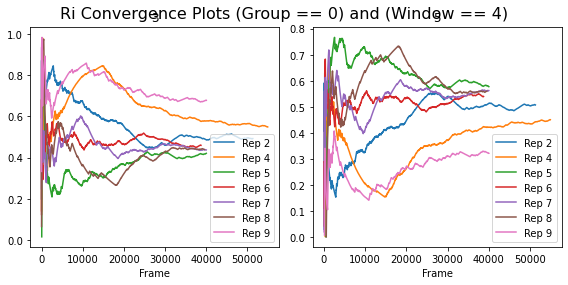

--- --- --- --- ---


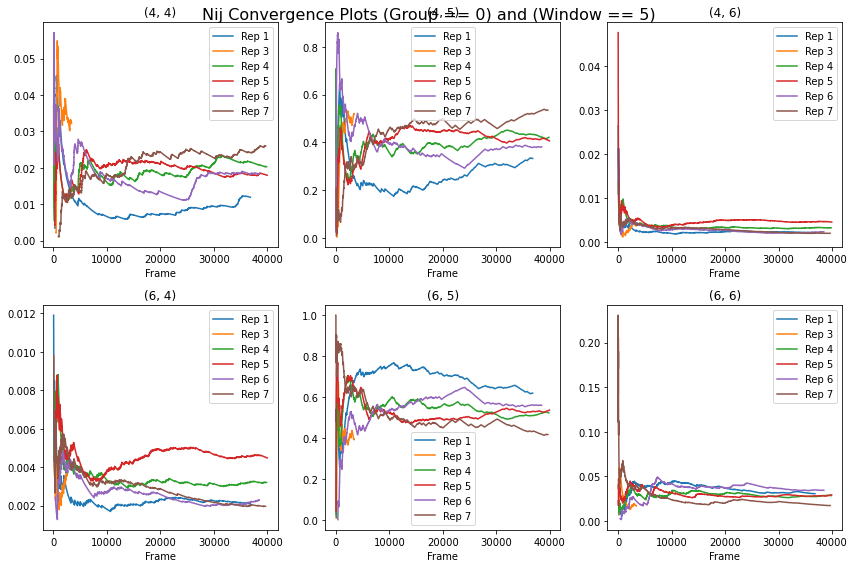

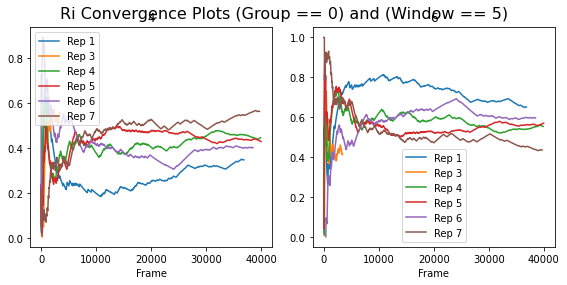

--- --- --- --- ---


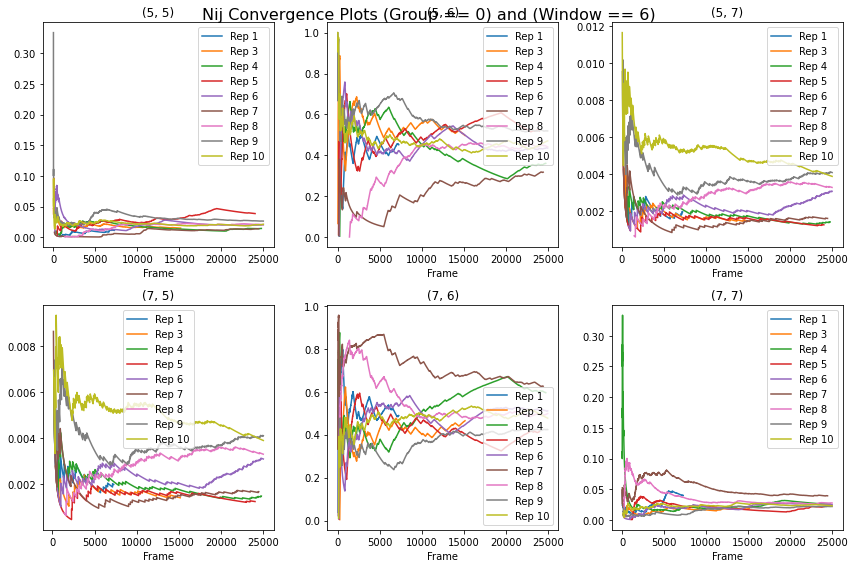

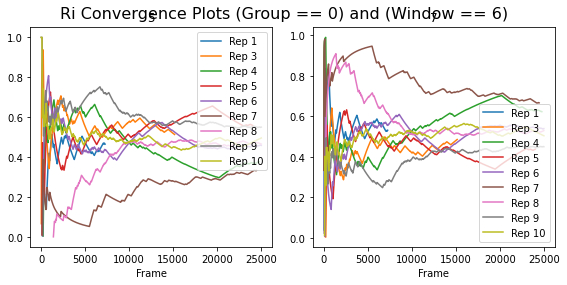

--- --- --- --- ---


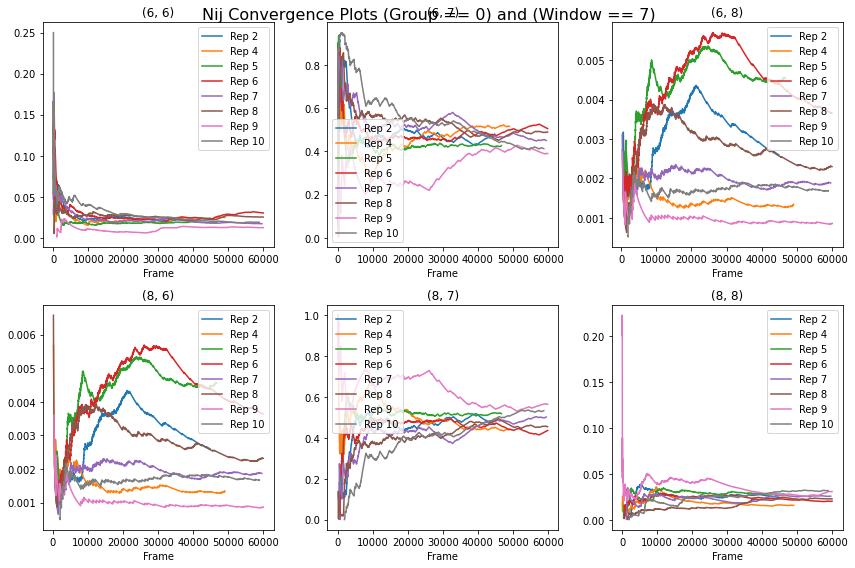

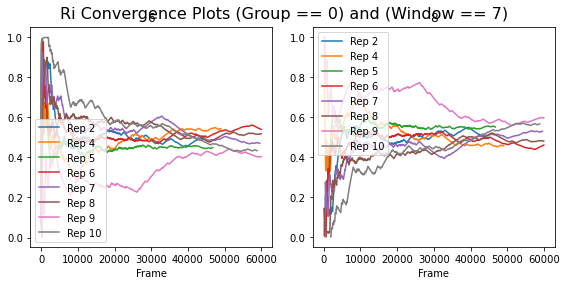

--- --- --- --- ---


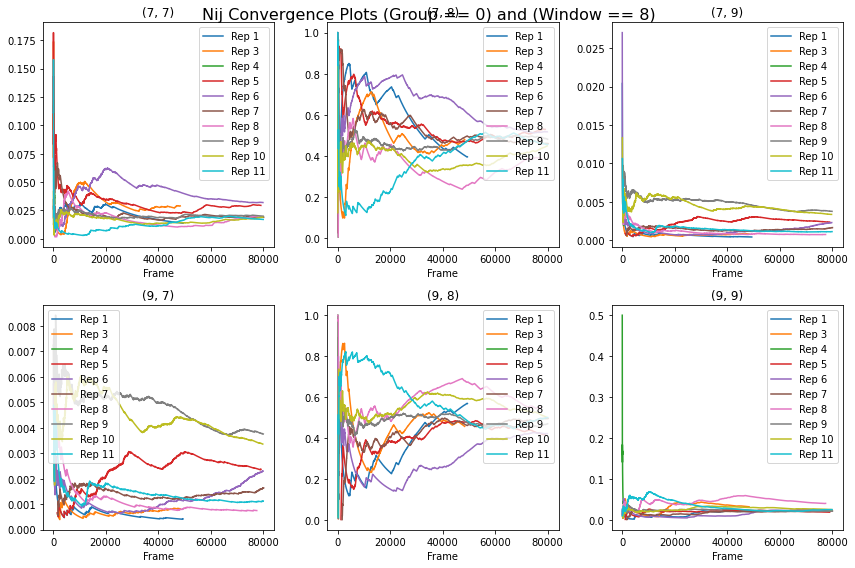

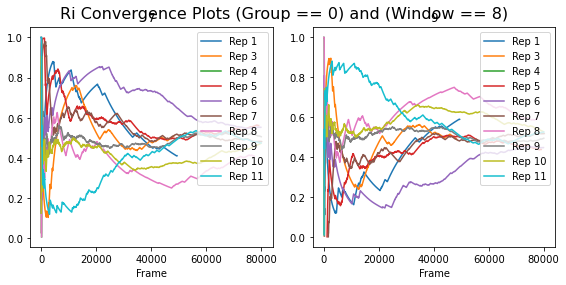

--- --- --- --- ---


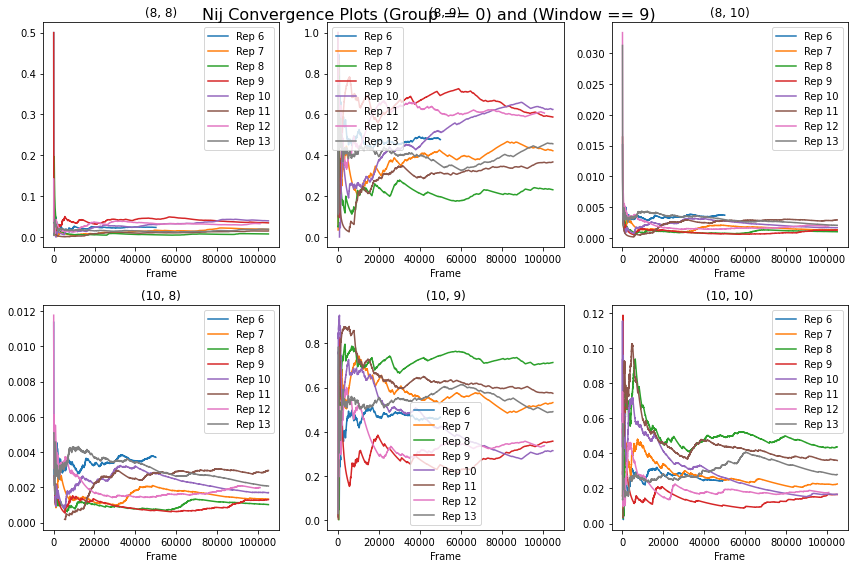

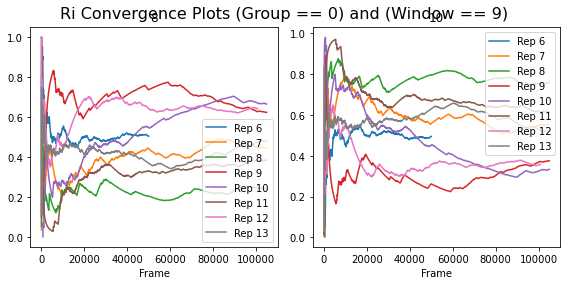

--- --- --- --- ---


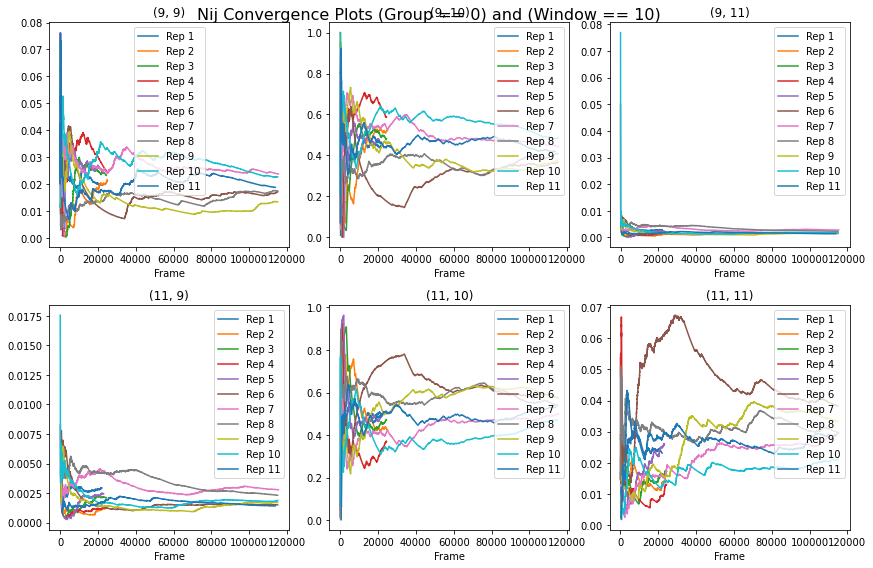

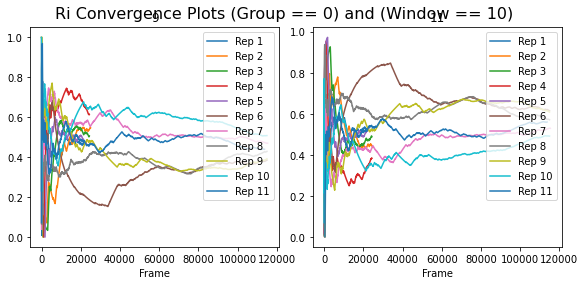

--- --- --- --- ---


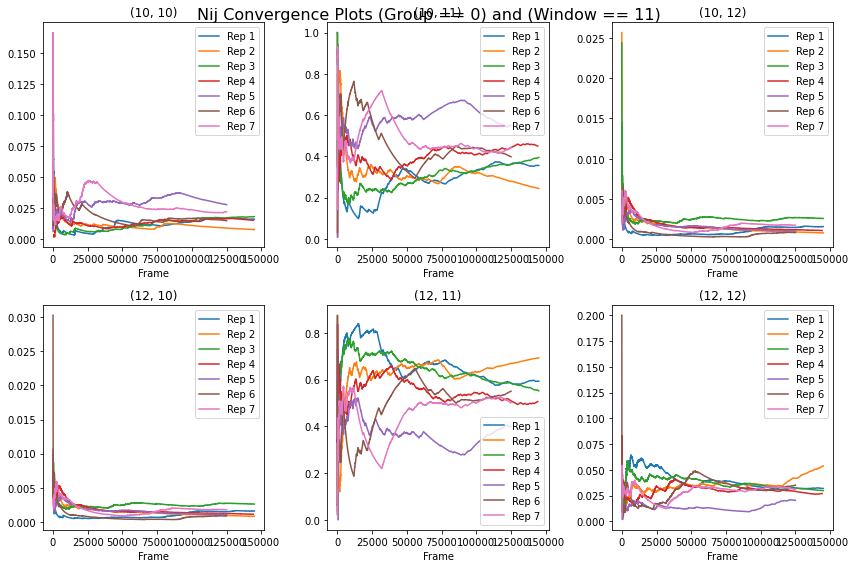

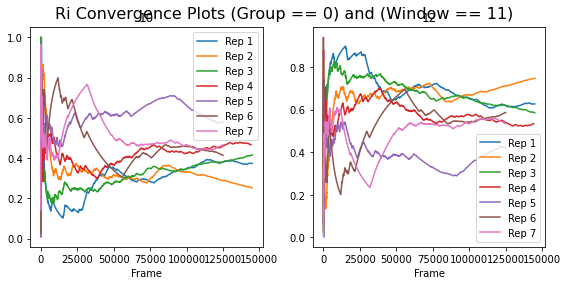

--- --- --- --- ---


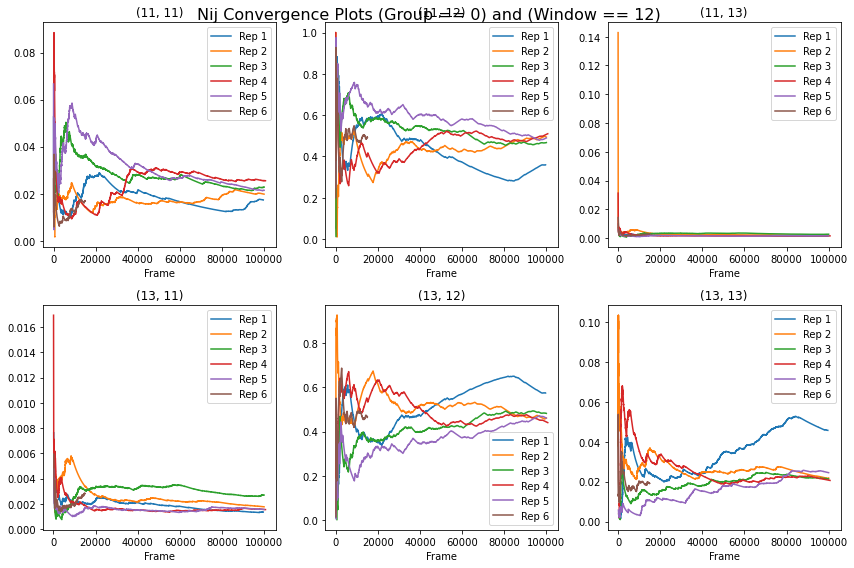

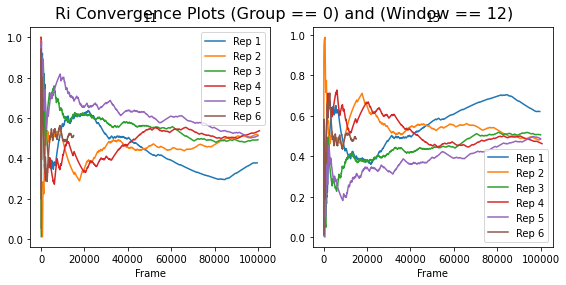

--- --- --- --- ---


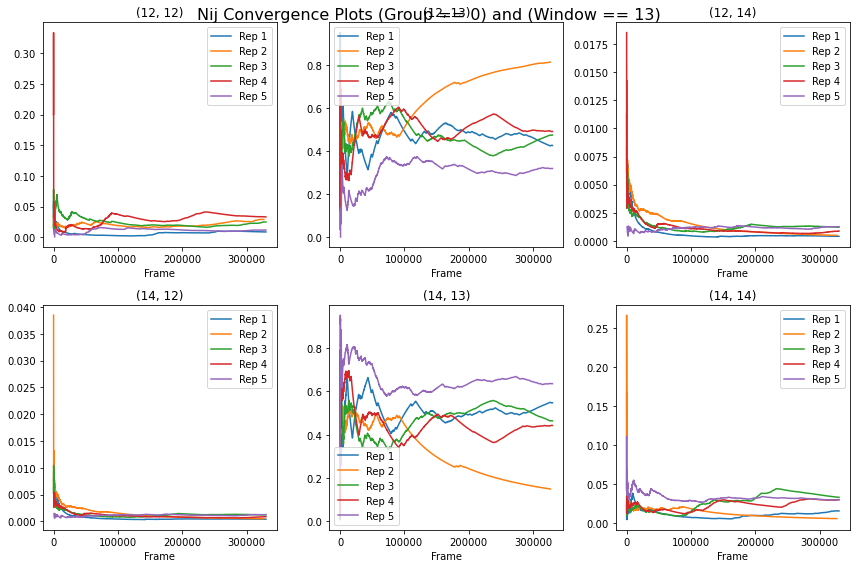

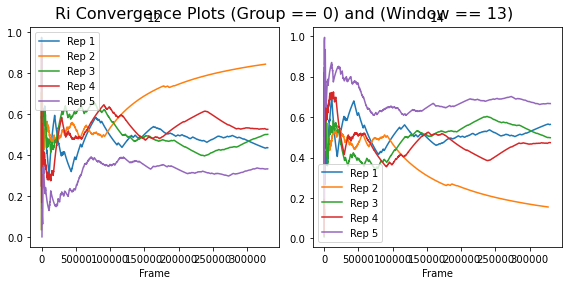

--- --- --- --- ---


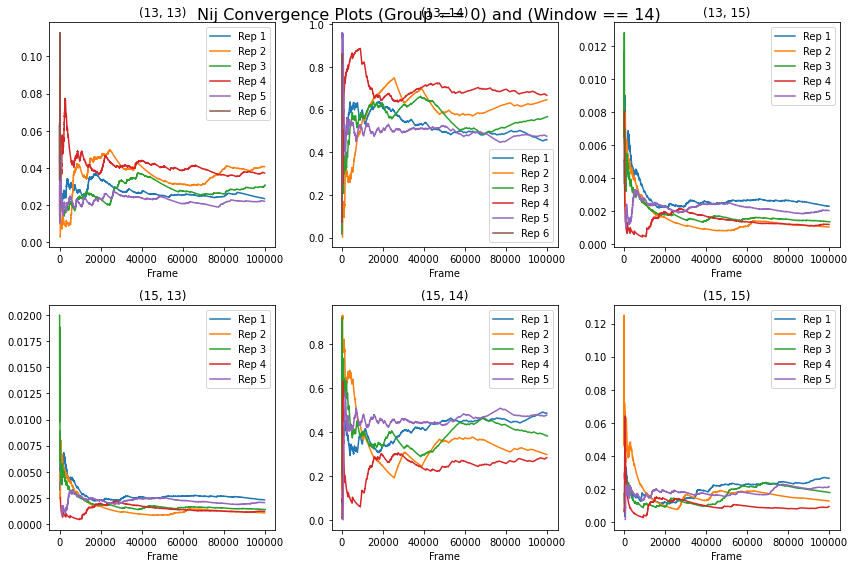

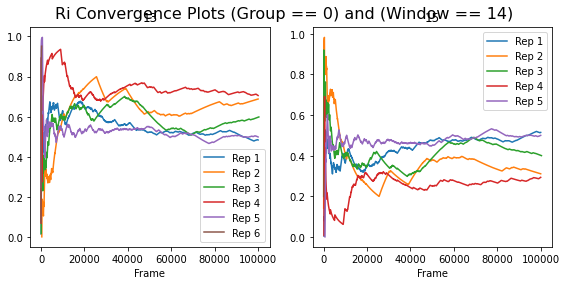

--- --- --- --- ---


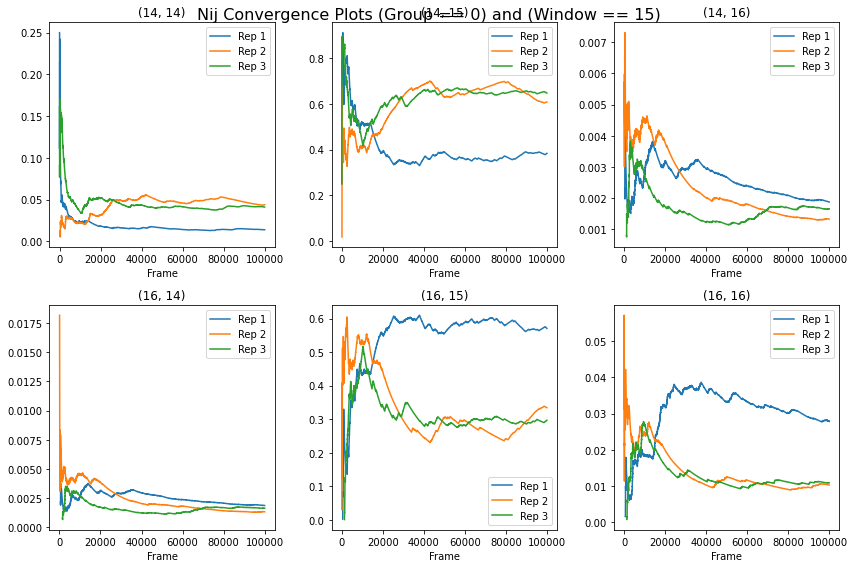

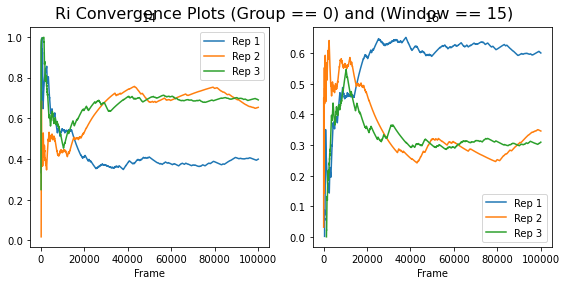

--- --- --- --- ---


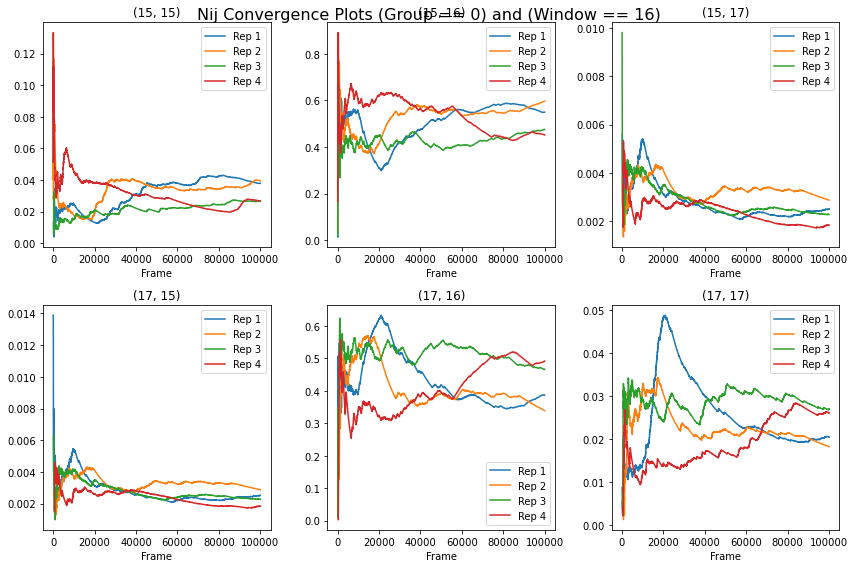

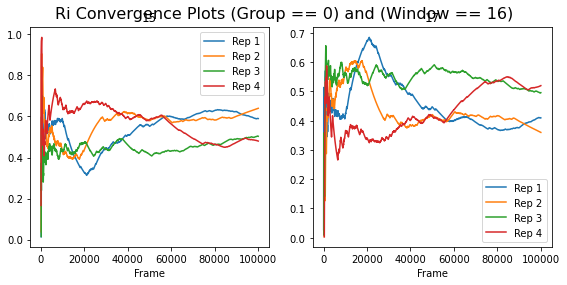

--- --- --- --- ---


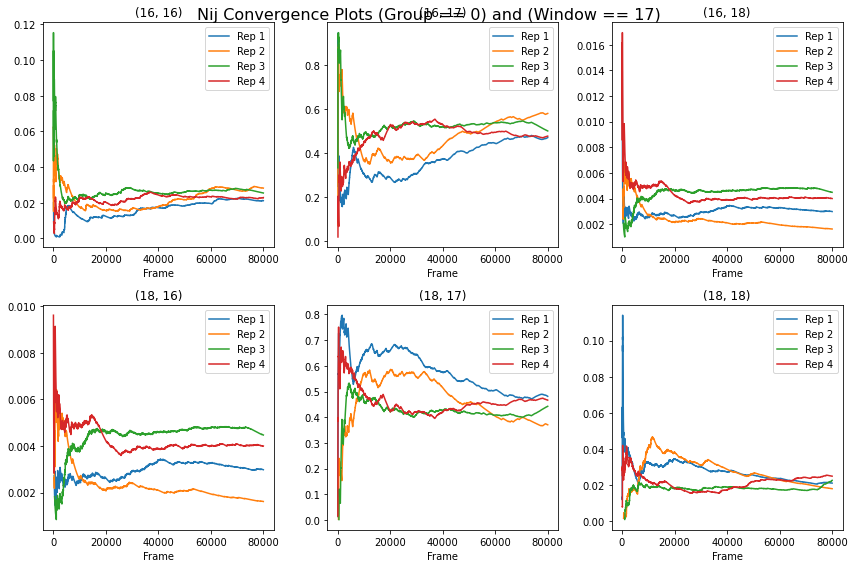

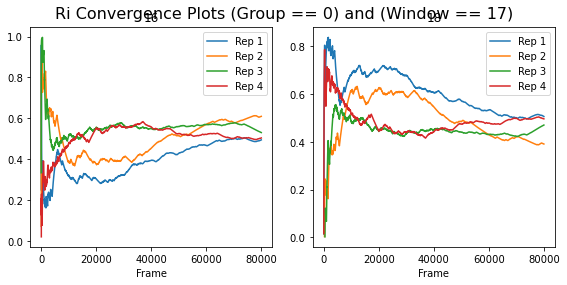

--- --- --- --- ---


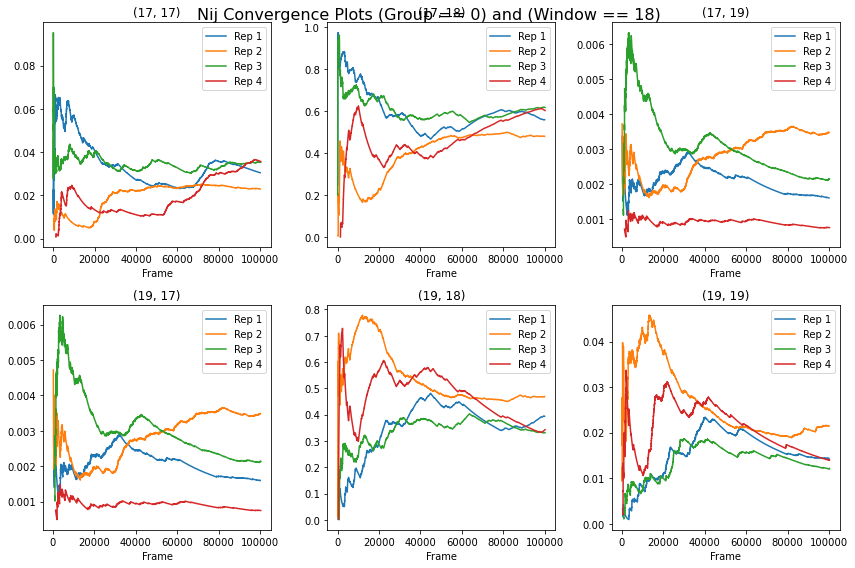

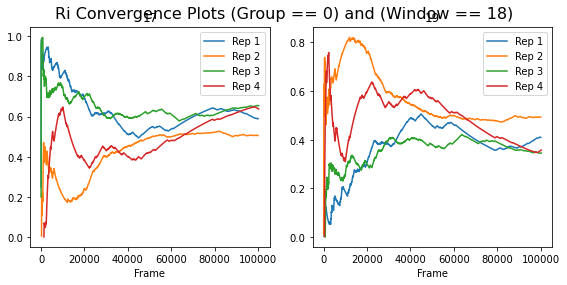

--- --- --- --- ---


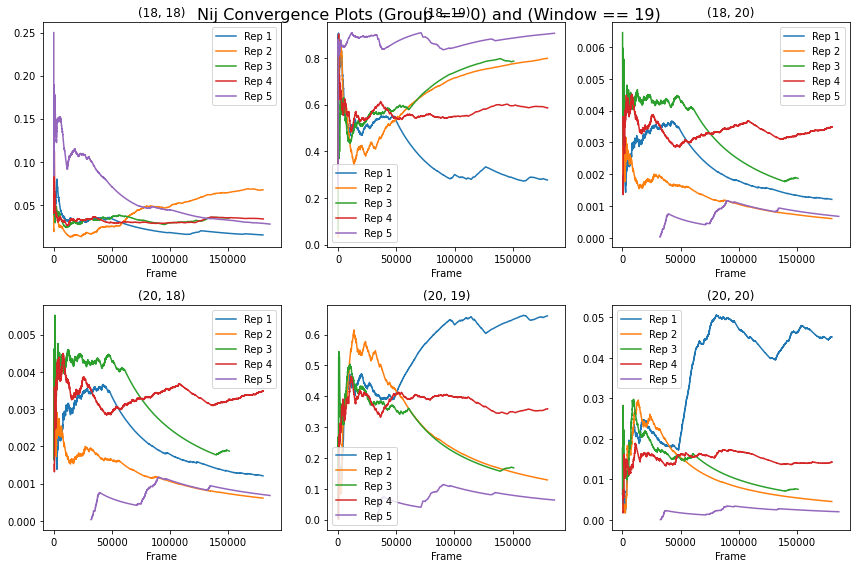

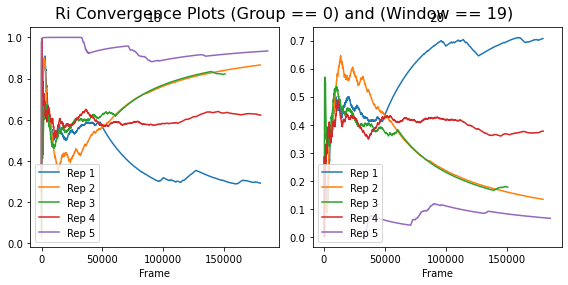

--- --- --- --- ---


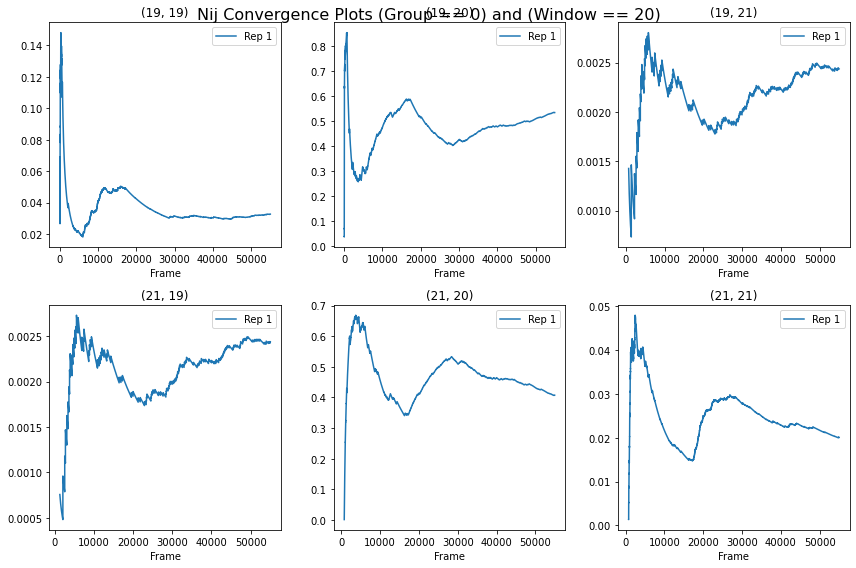

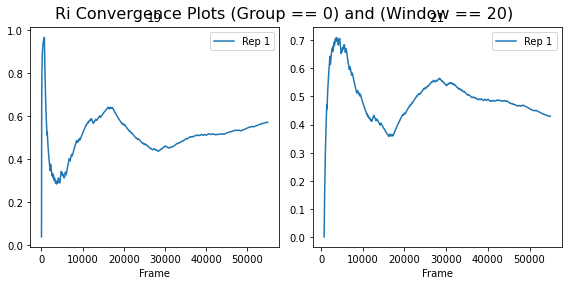

--- --- --- --- ---


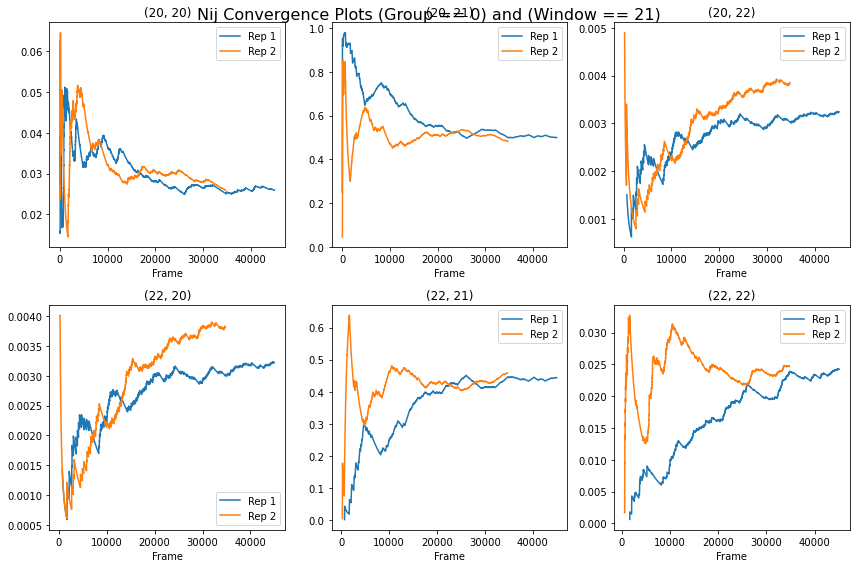

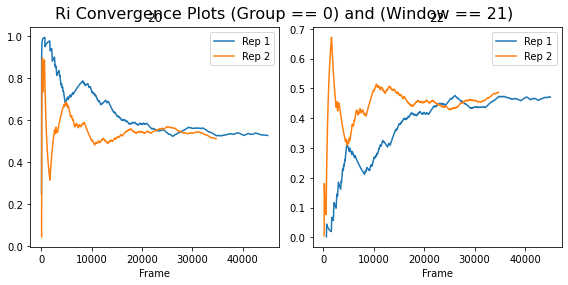

--- --- --- --- ---


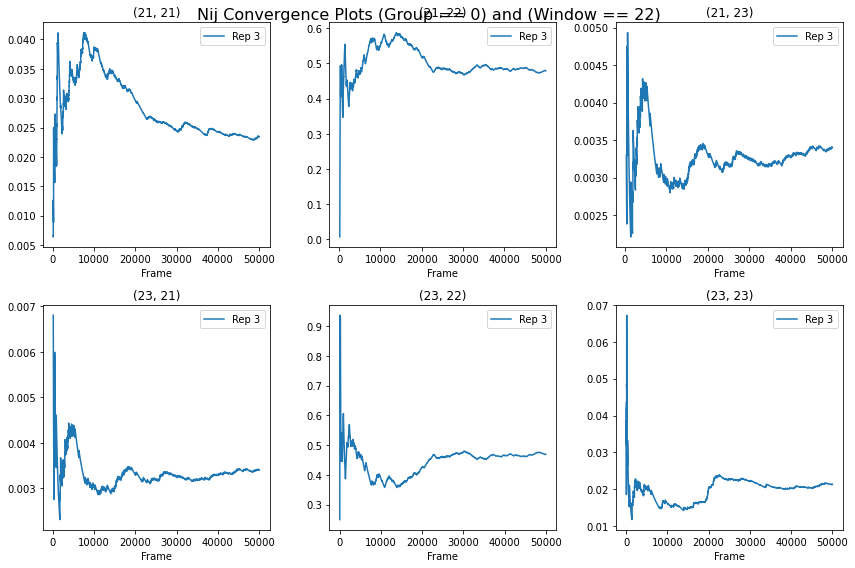

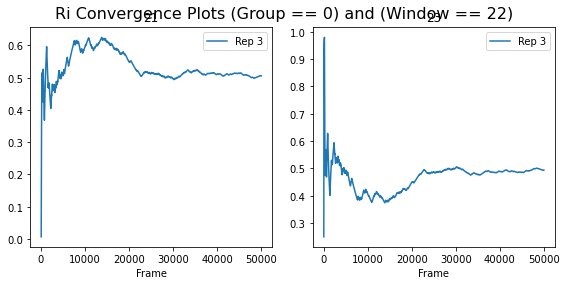

--- --- --- --- ---


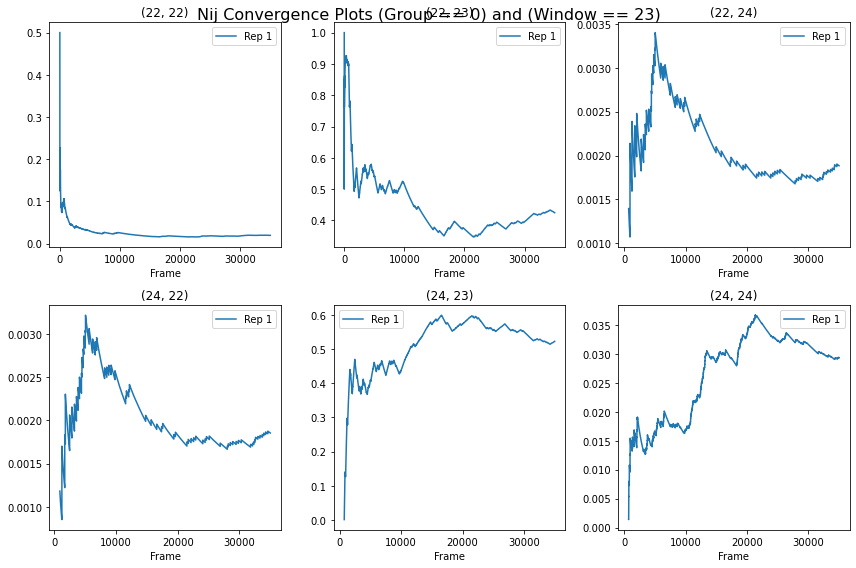

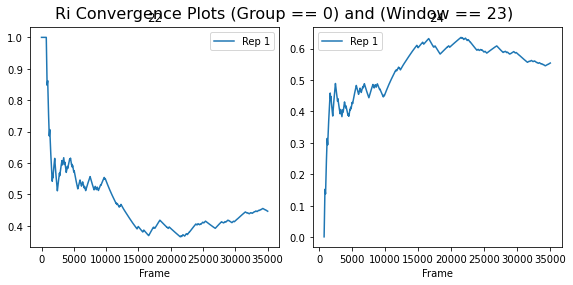

--- --- --- --- ---


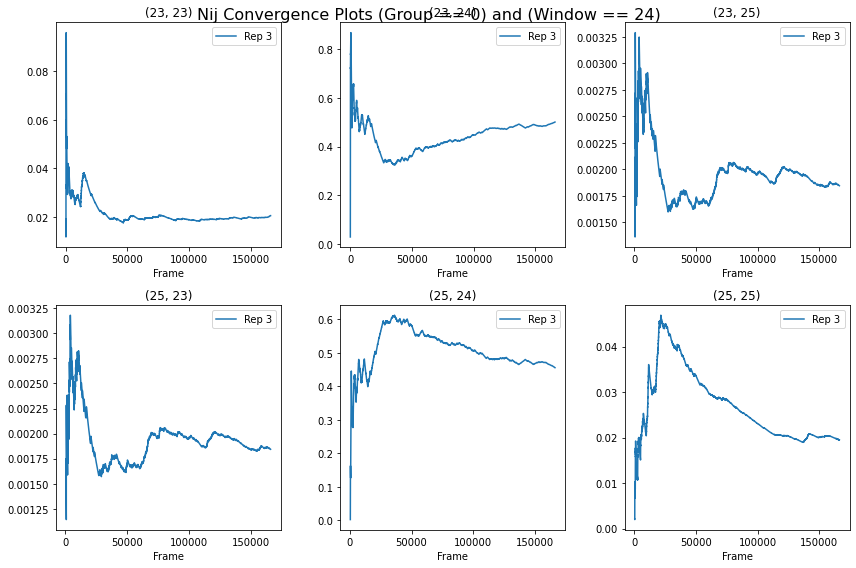

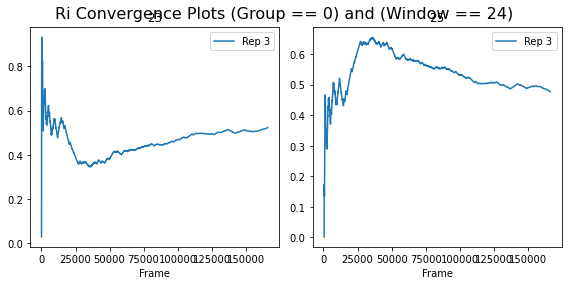

--- --- --- --- ---


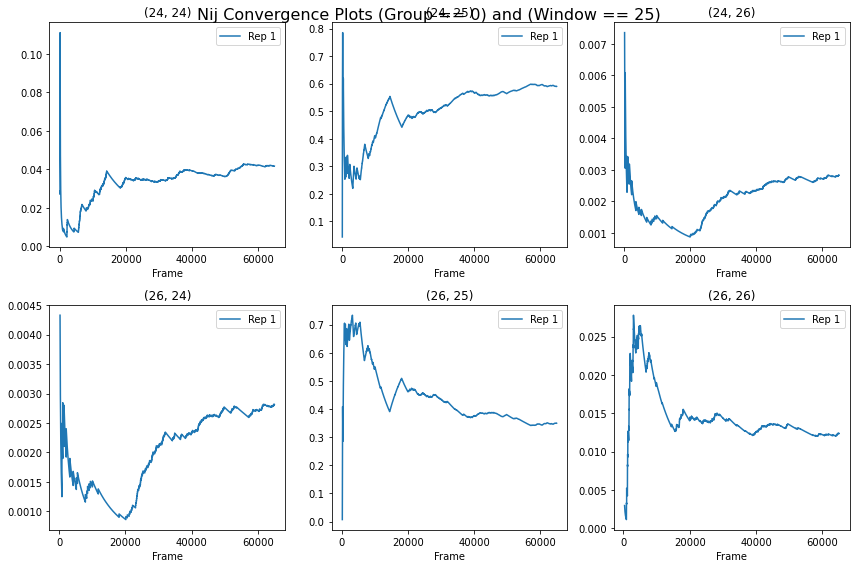

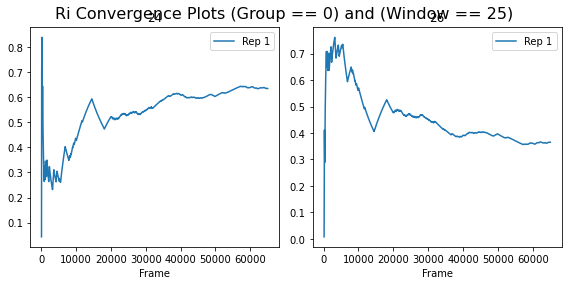

--- --- --- --- ---


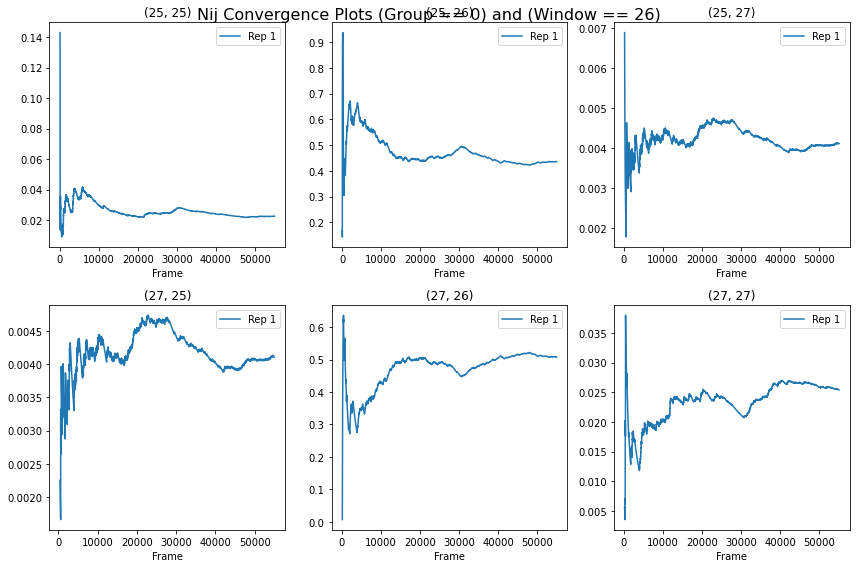

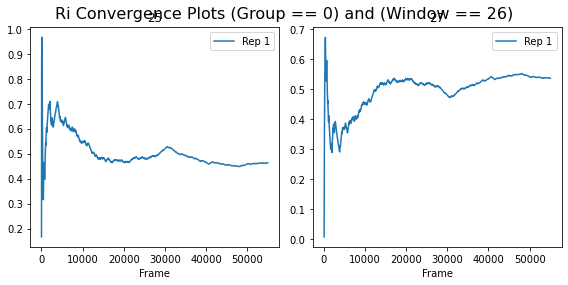

--- --- --- --- ---


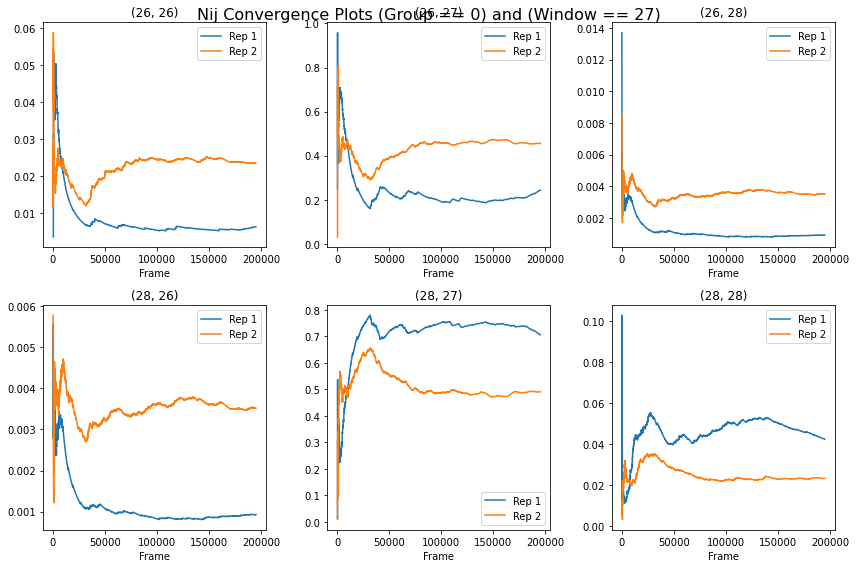

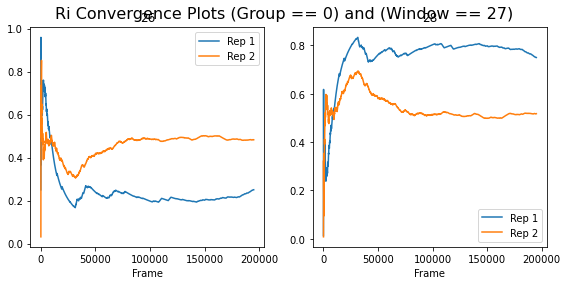

--- --- --- --- ---


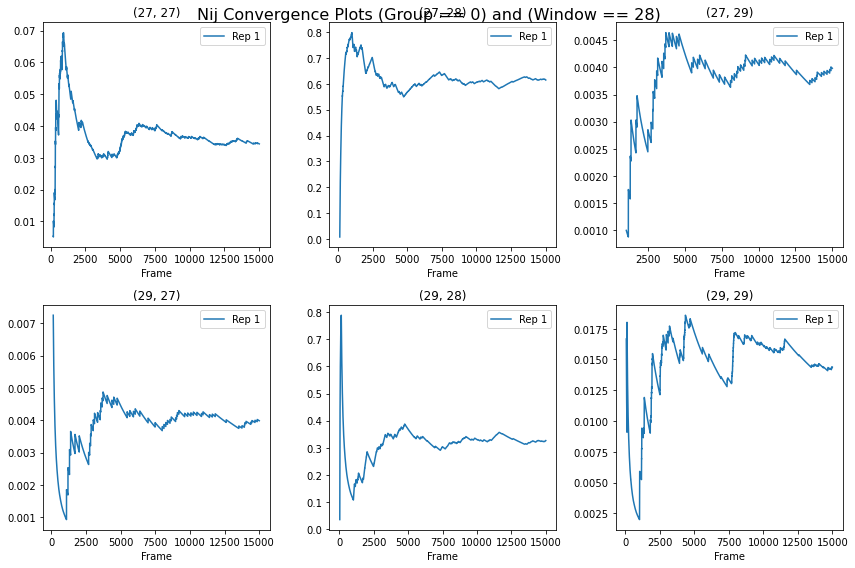

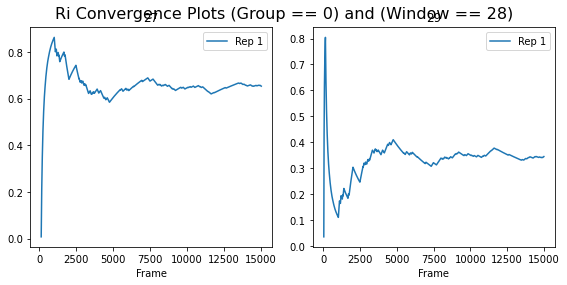

--- --- --- --- ---


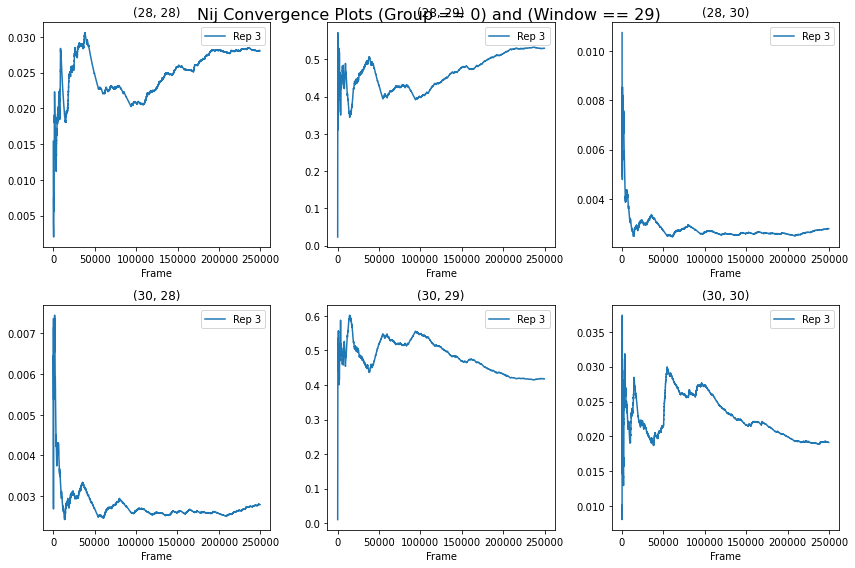

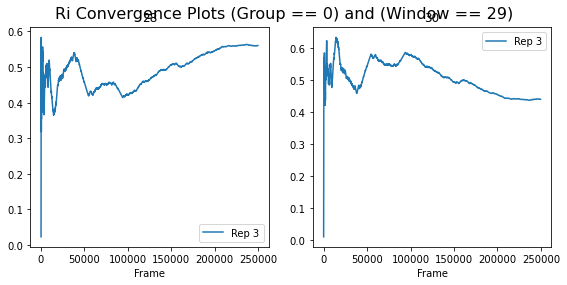

--- --- --- --- ---


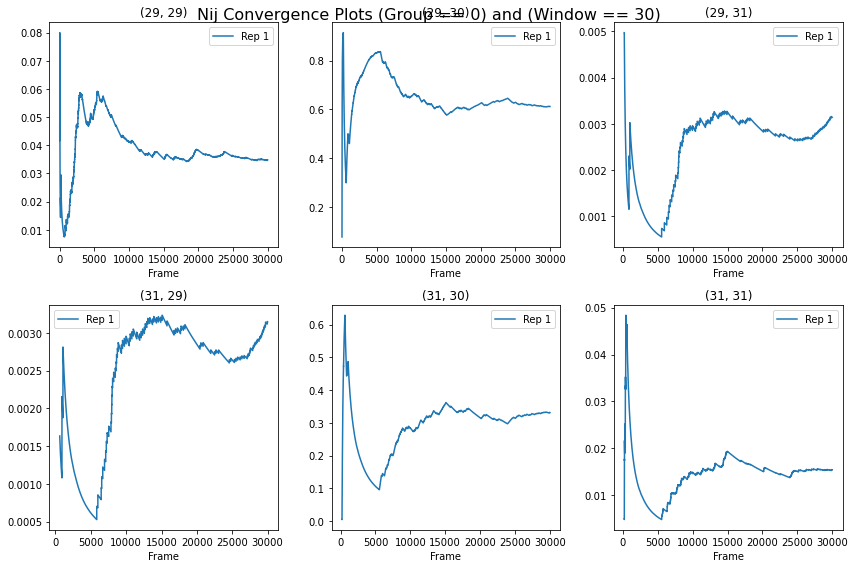

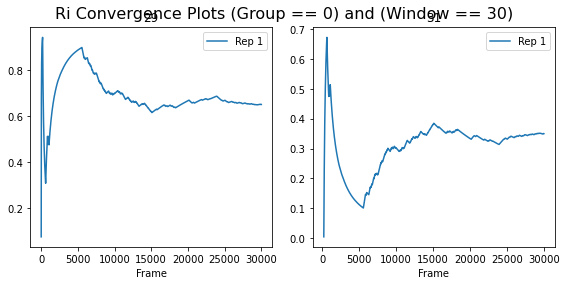

--- --- --- --- ---


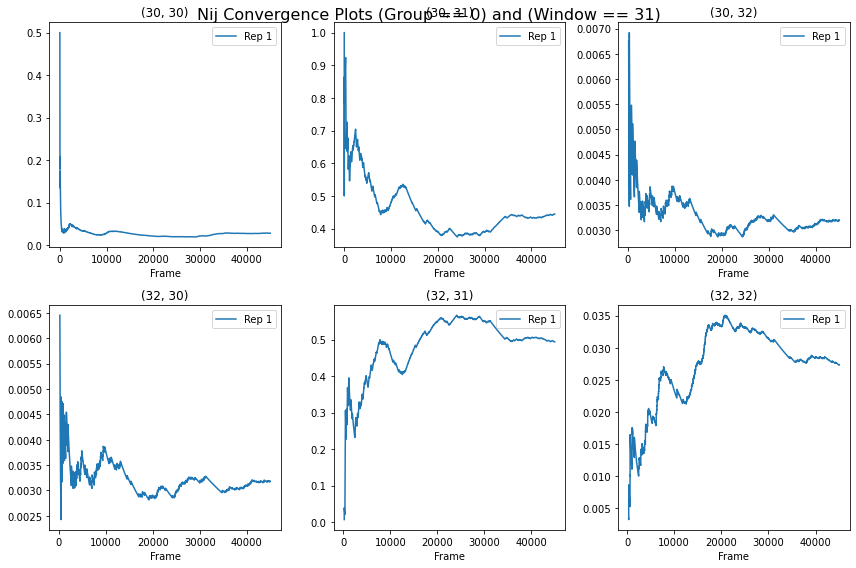

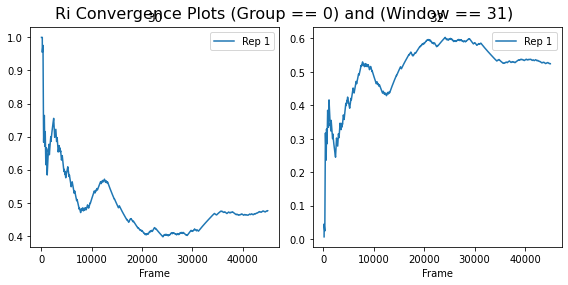

--- --- --- --- ---


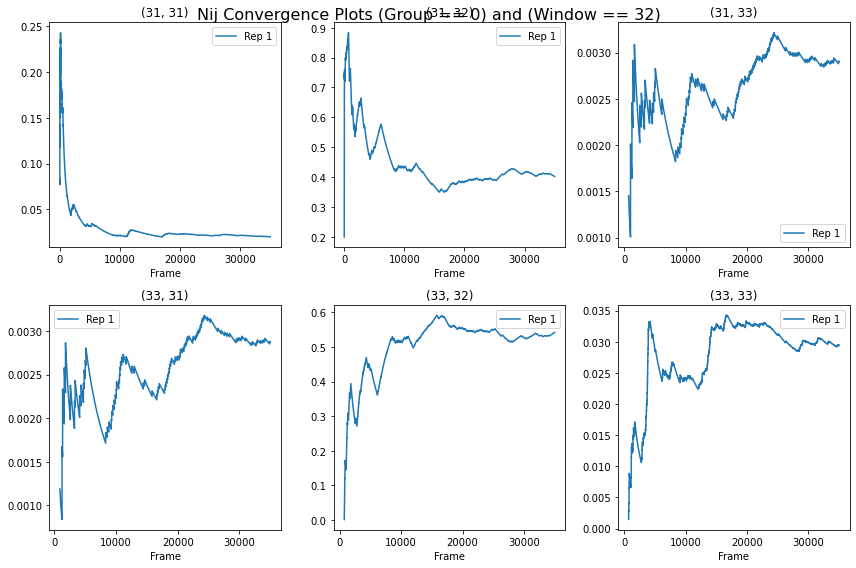

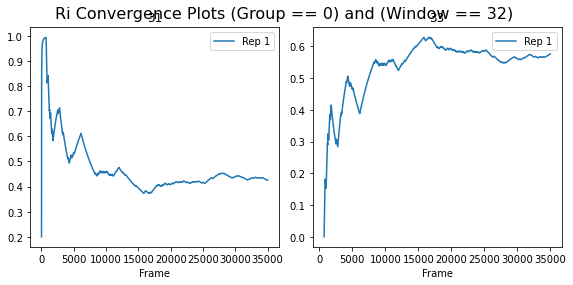

--- --- --- --- ---


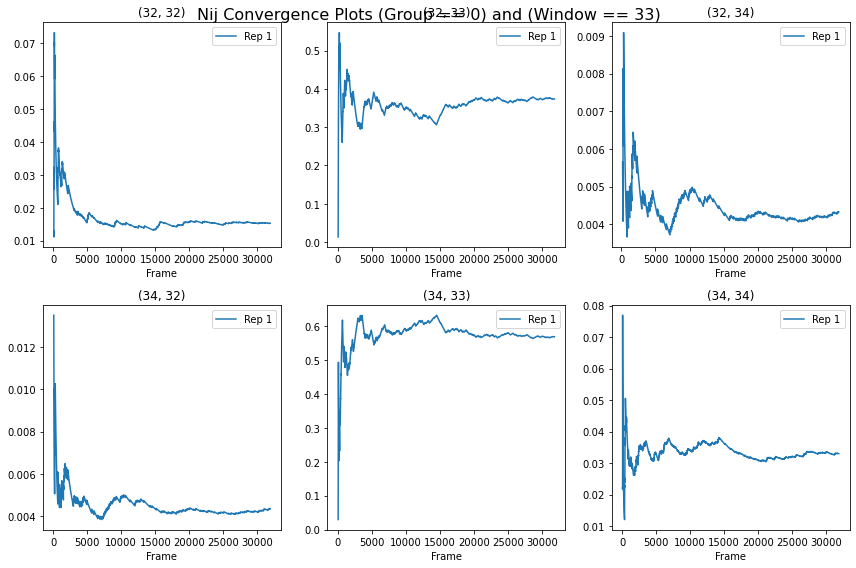

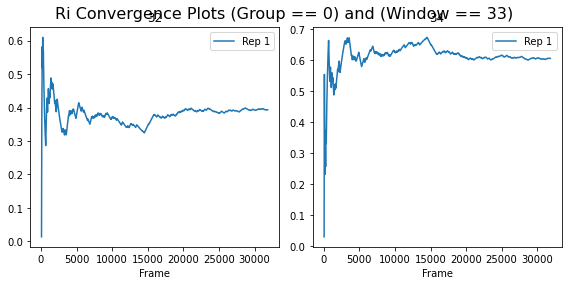

--- --- --- --- ---


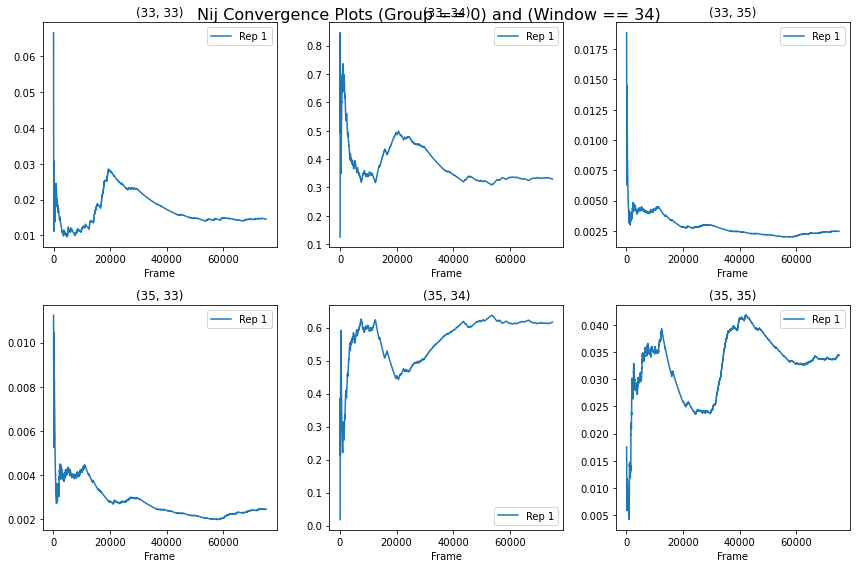

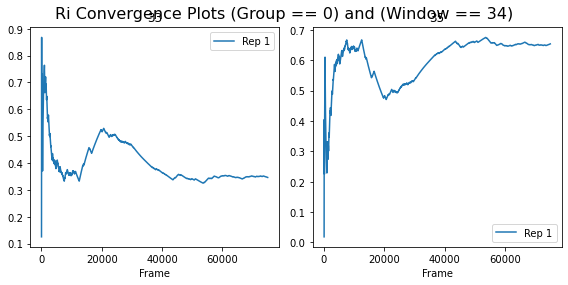

--- --- --- --- ---


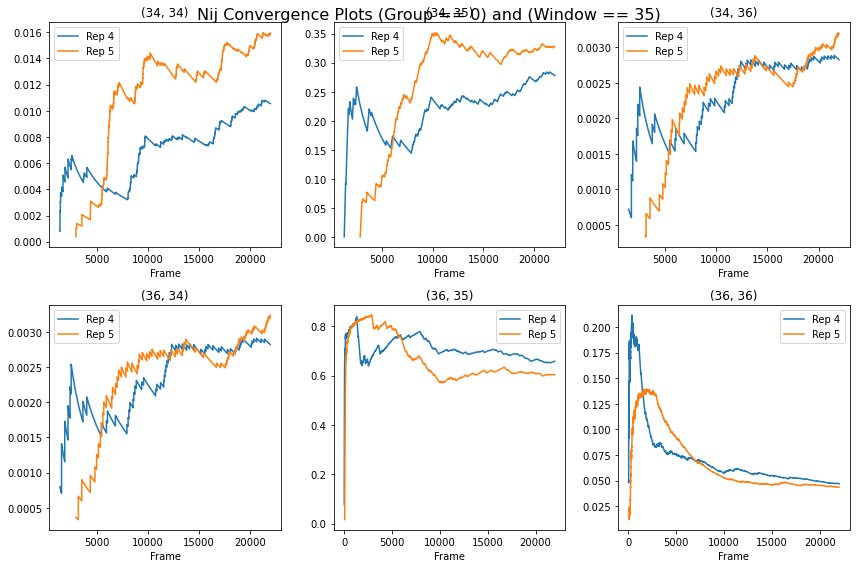

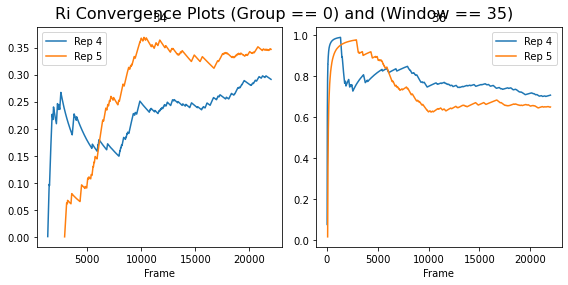

--- --- --- --- ---


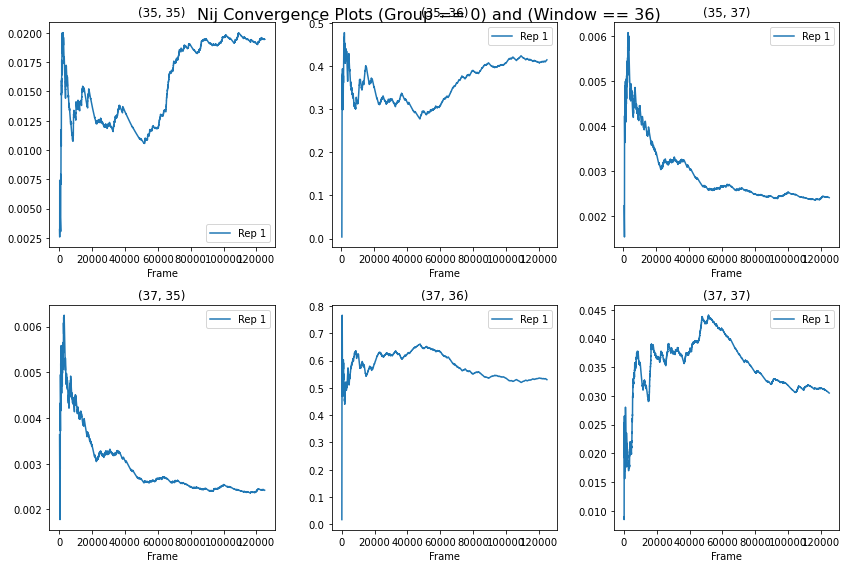

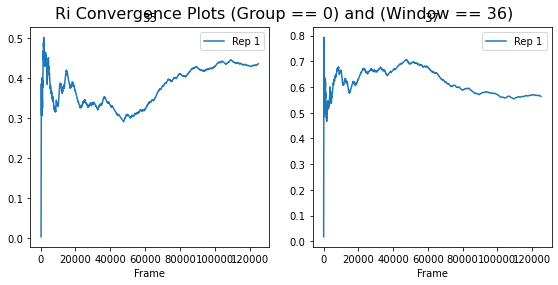

--- --- --- --- ---


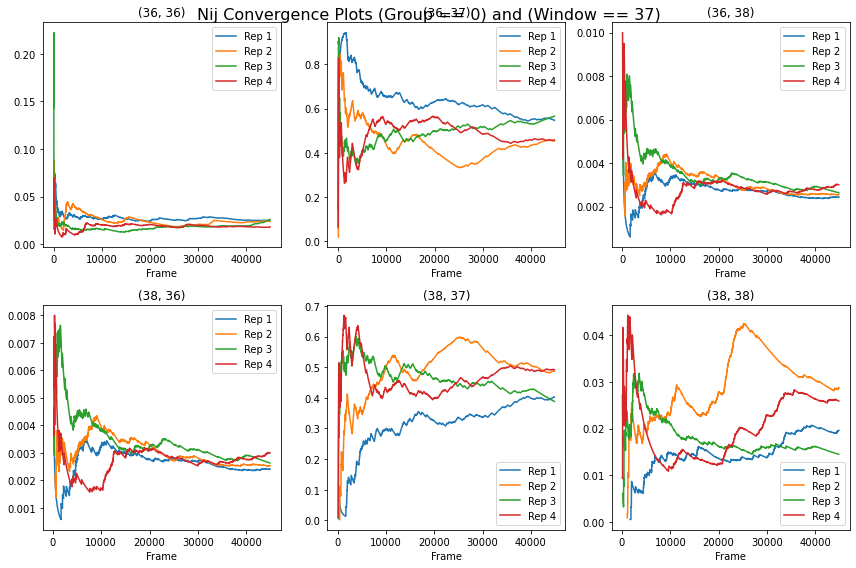

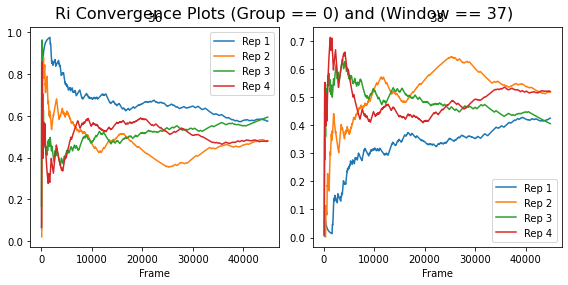

--- --- --- --- ---


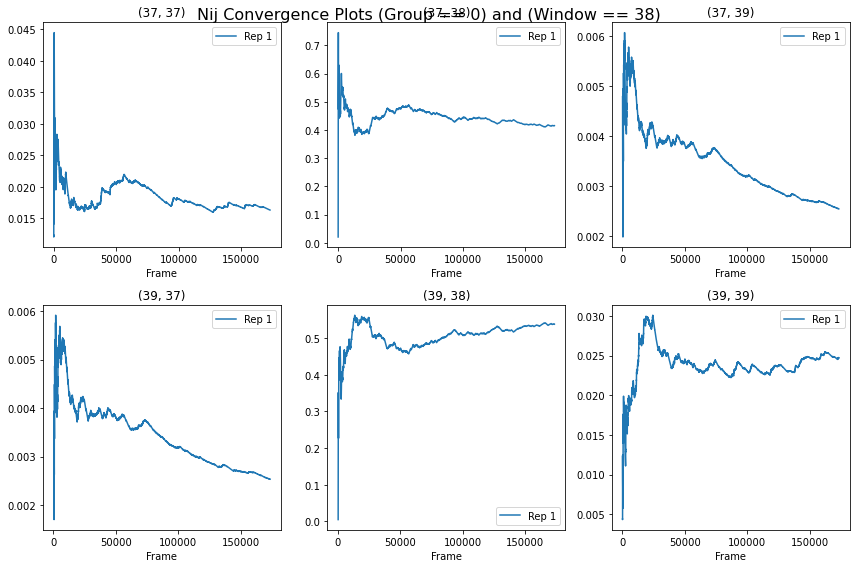

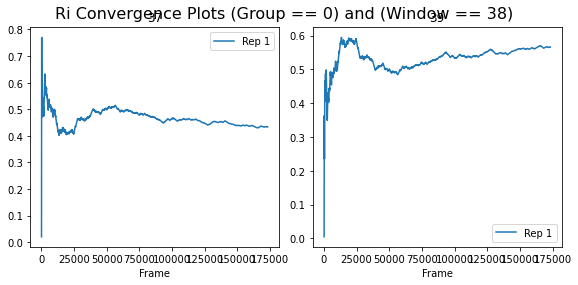

--- --- --- --- ---


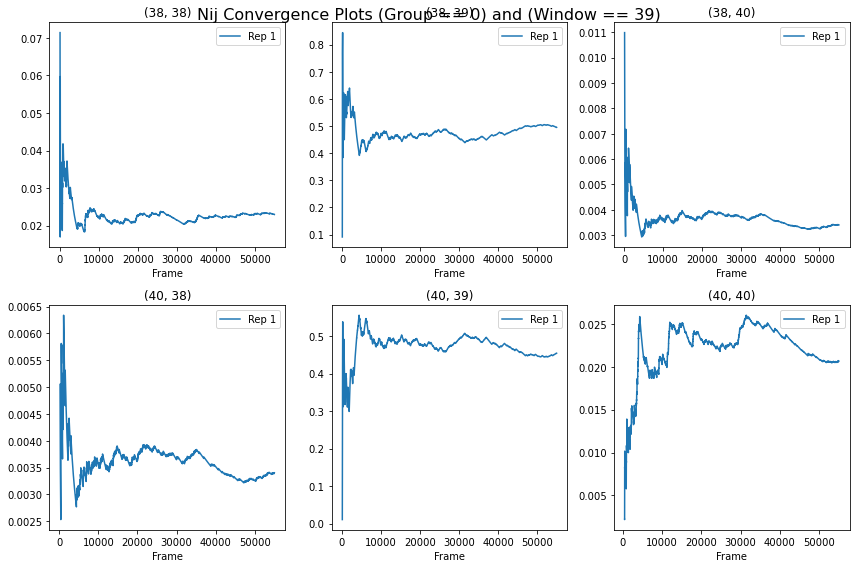

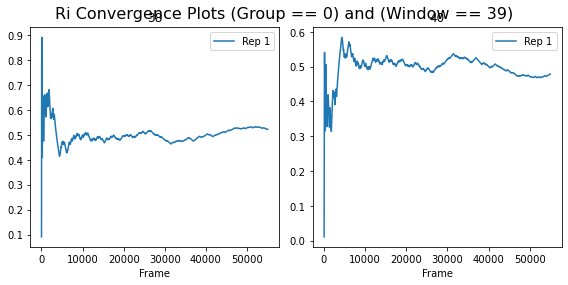

--- --- --- --- ---


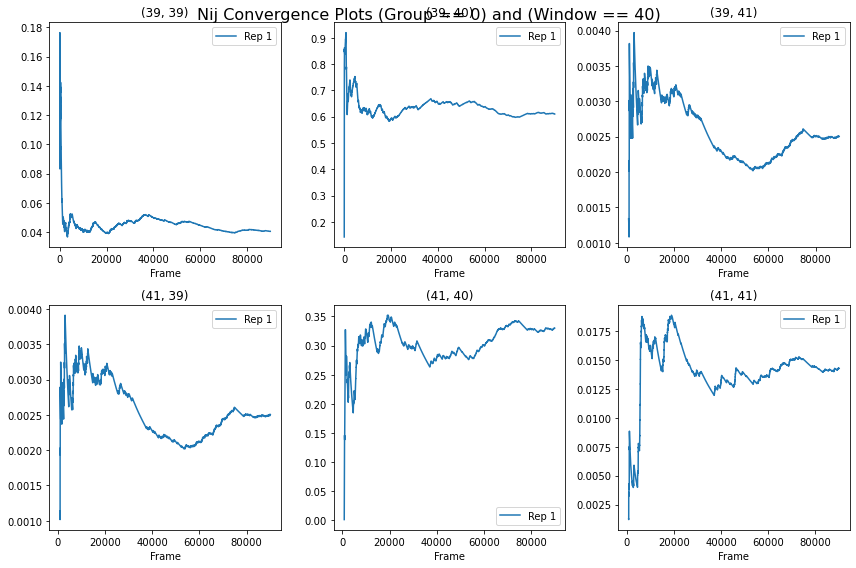

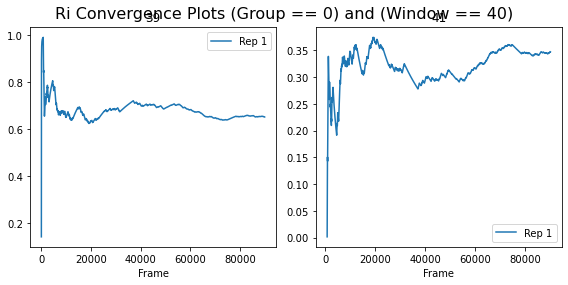

--- --- --- --- ---


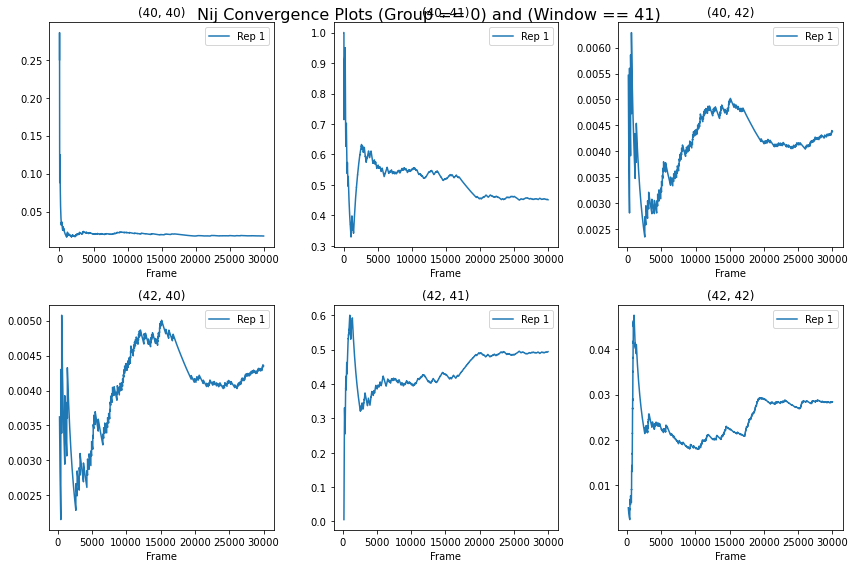

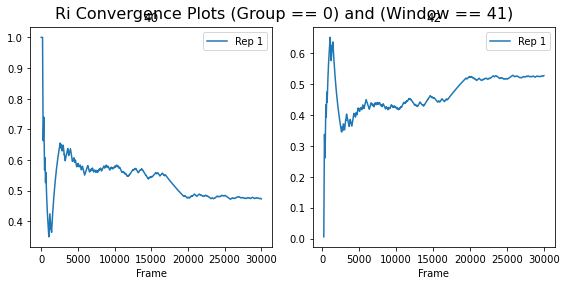

--- --- --- --- ---


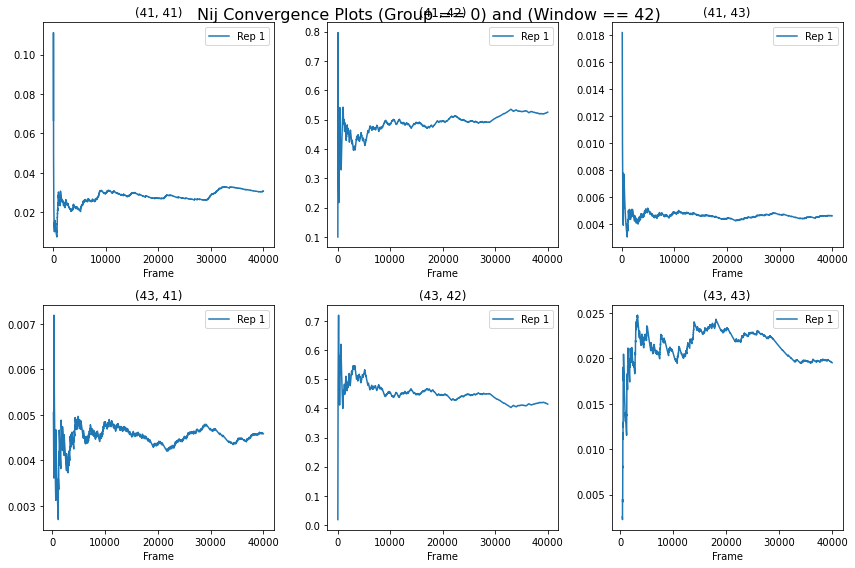

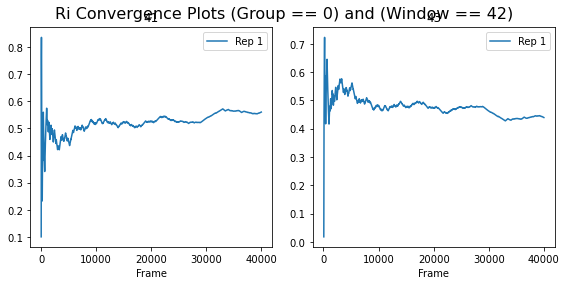

--- --- --- --- ---


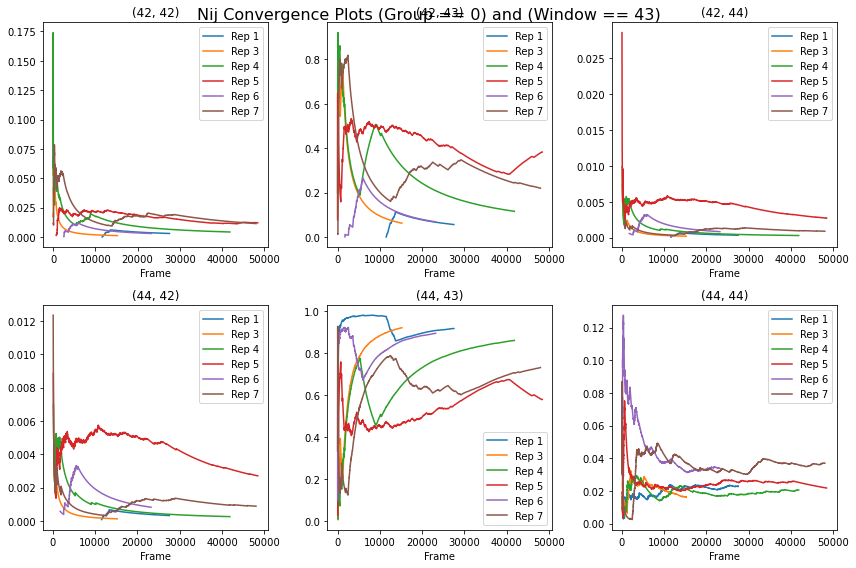

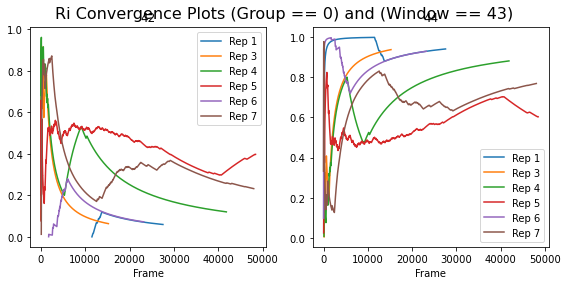

--- --- --- --- ---


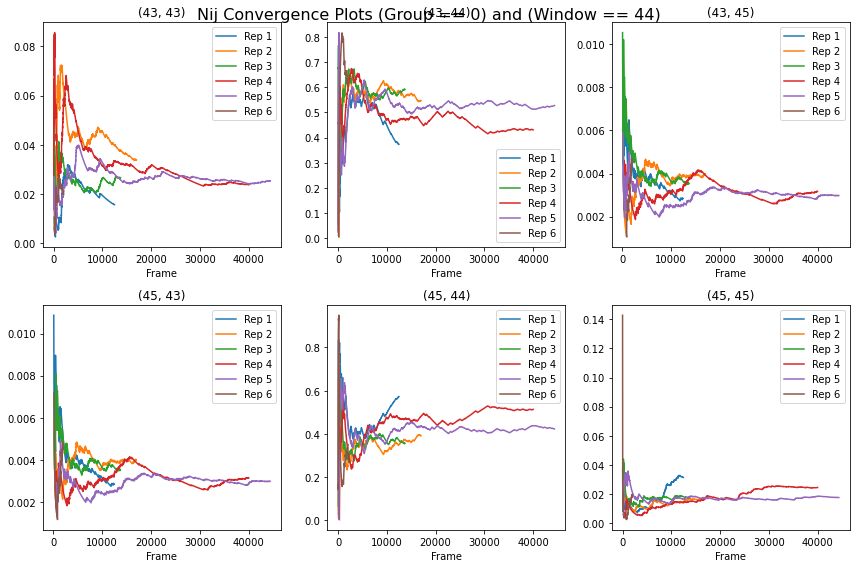

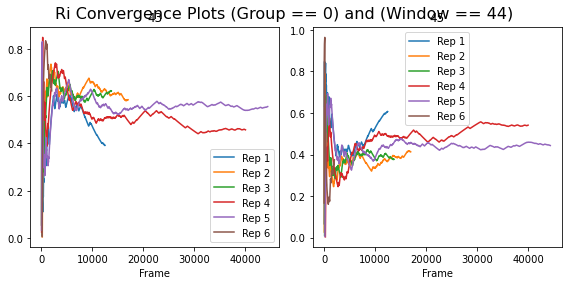

--- --- --- --- ---


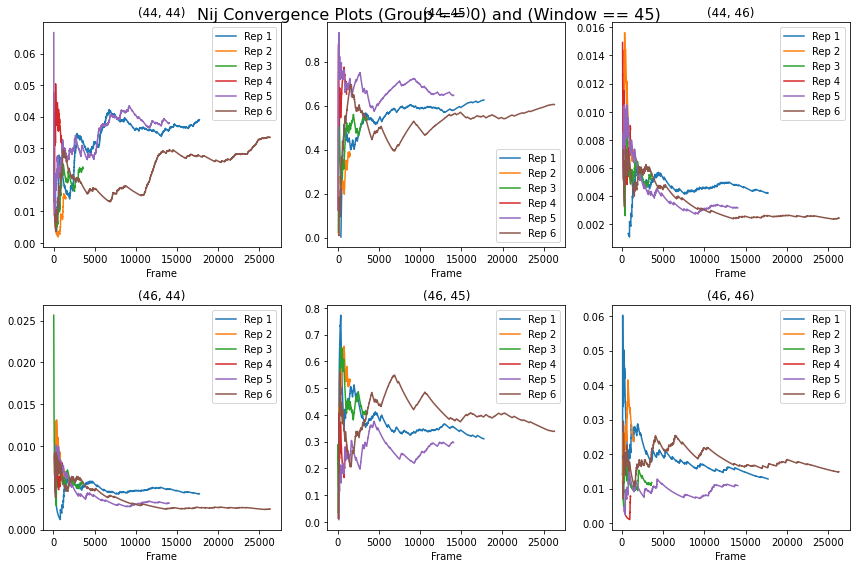

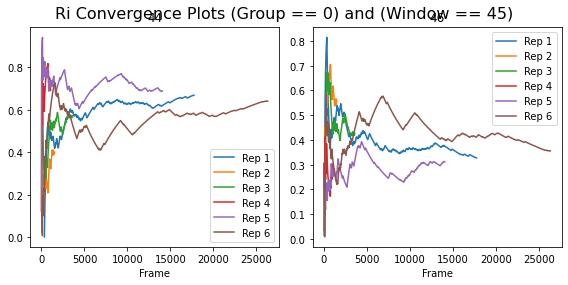

--- --- --- --- ---


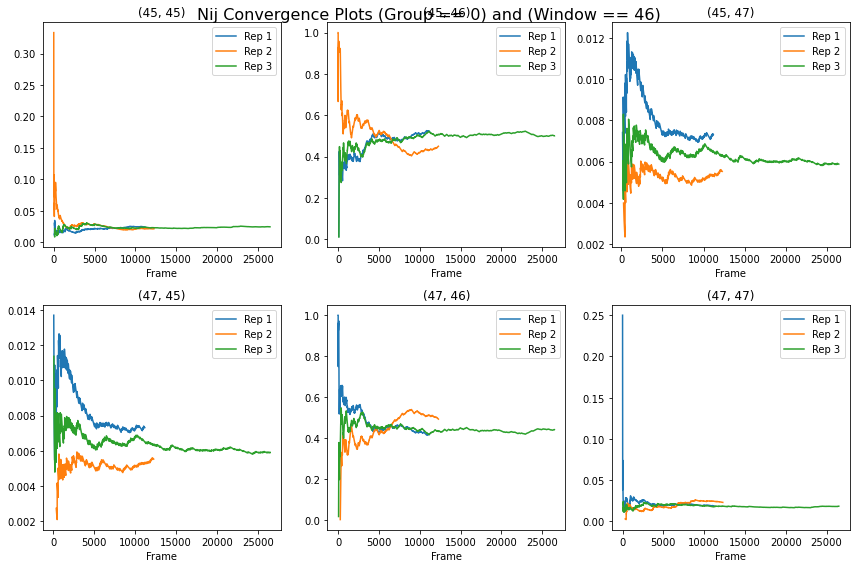

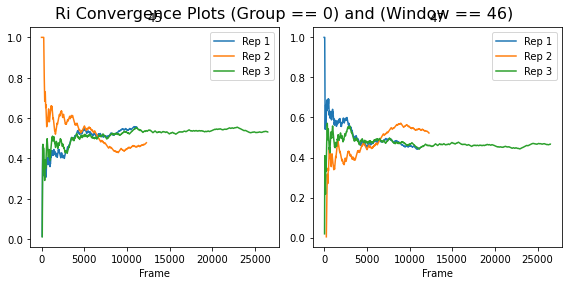

--- --- --- --- ---


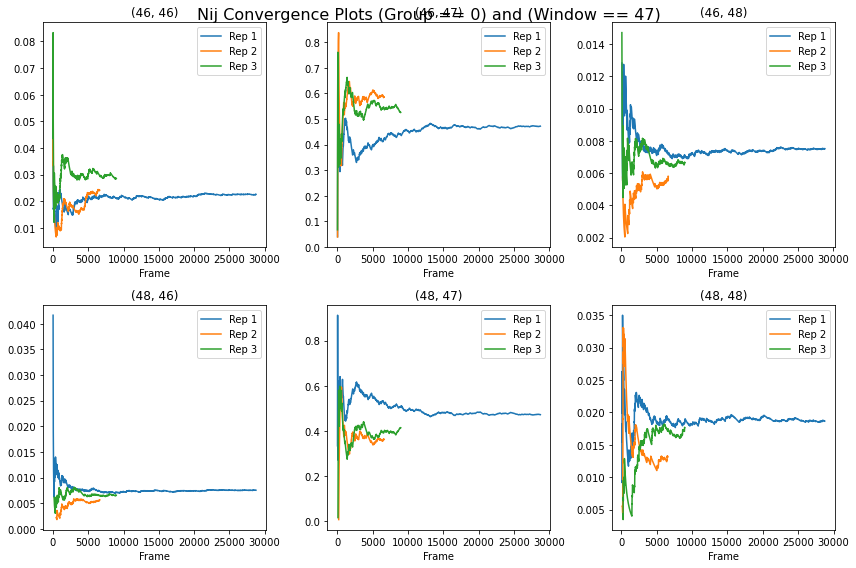

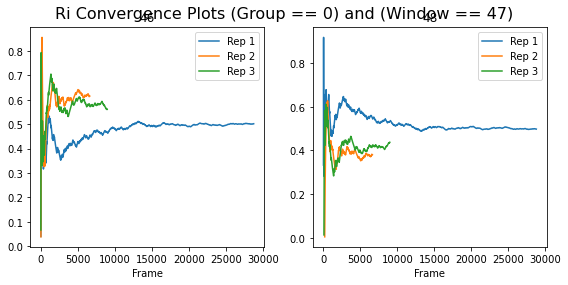

--- --- --- --- ---


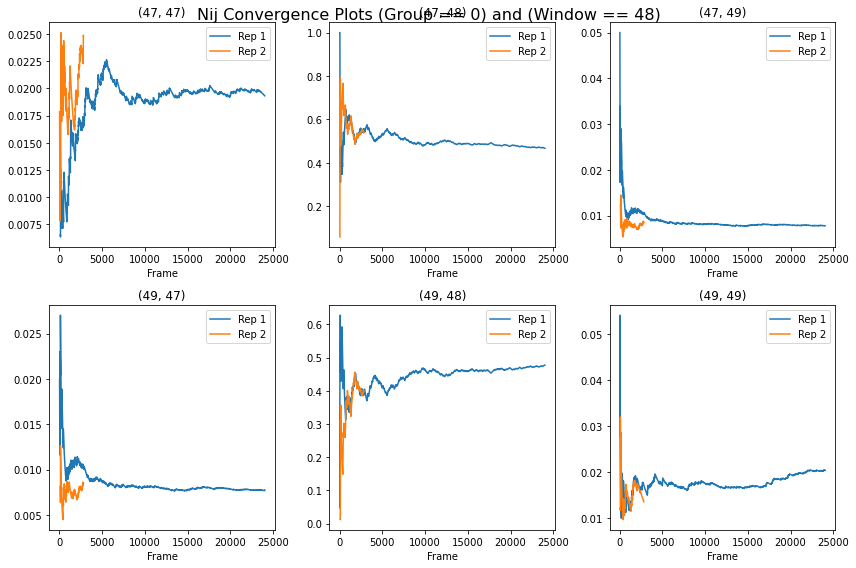

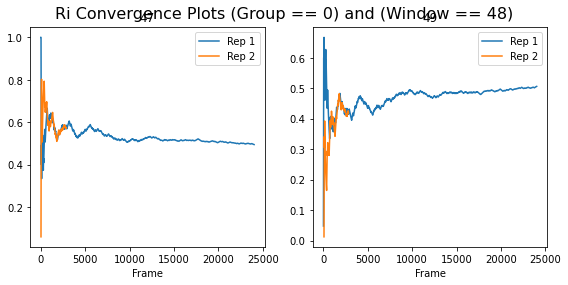

--- --- --- --- ---


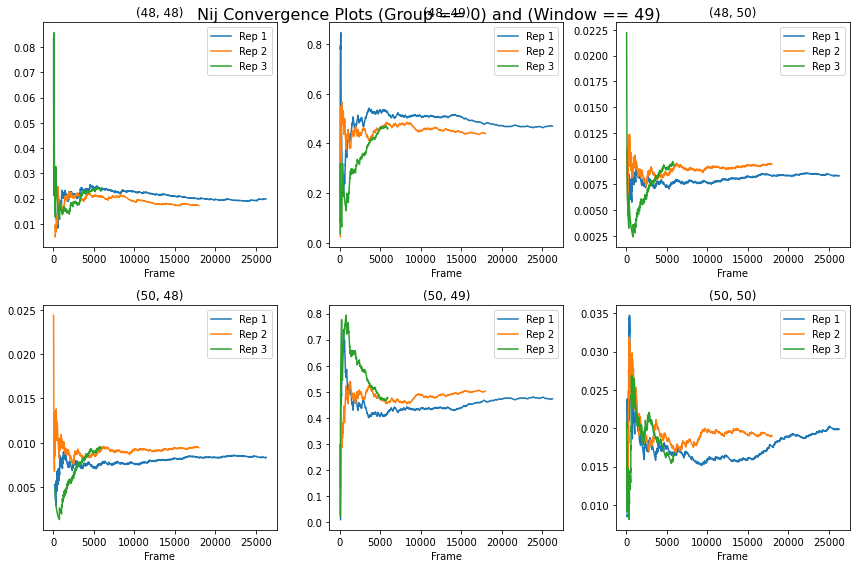

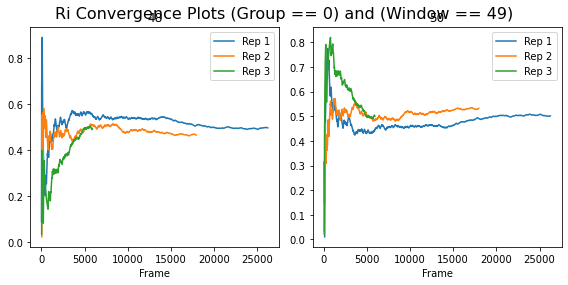

--- --- --- --- ---


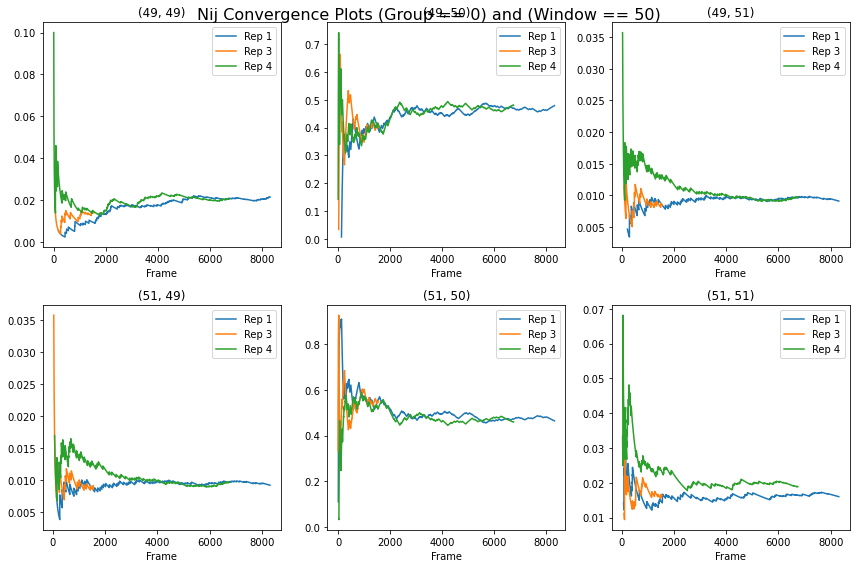

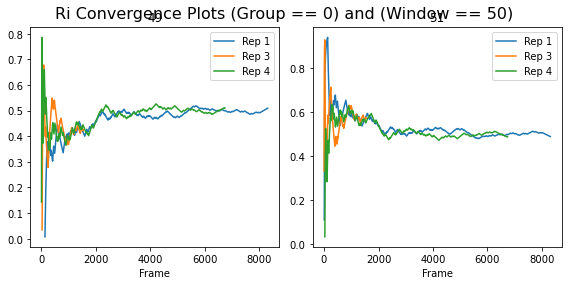

--- --- --- --- ---


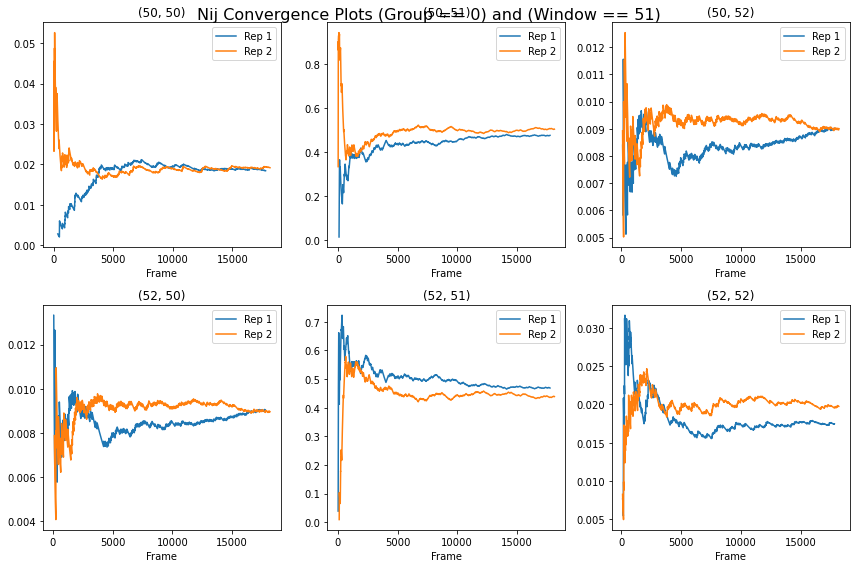

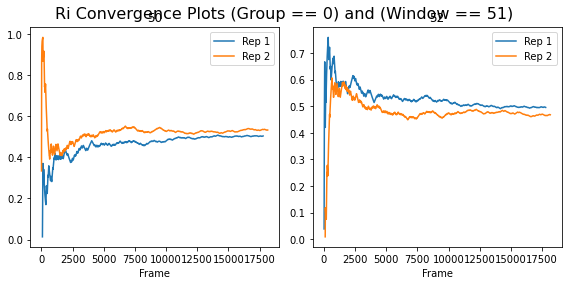

--- --- --- --- ---


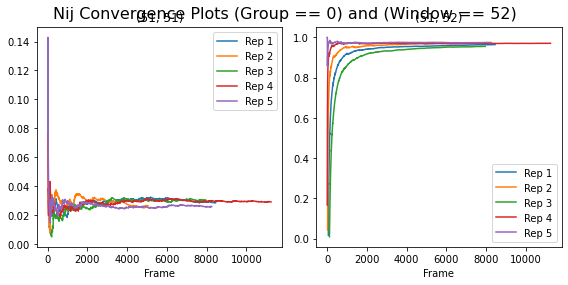

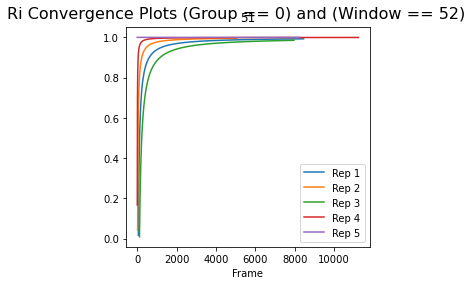

--- --- --- --- ---


In [12]:
groupingColumns=['Group','Window']

for group in Nij_Frame.groupby(groupingColumns):
    groupName,group_NijData=group
    
    group_NijData=group_NijData
    groupQuery=' and '.join([
        '({colname} == {colval})'.format(
            colname=colName,colval=colVal
        ) for colName,colVal in zip(groupingColumns,groupName)
    ])
    
    group_RiData=Ri_Frame.query(groupQuery)
    
    group_CountData=countFrame.query(groupQuery)
    
    nijPlotGroups=group_NijData.groupby(['BinName_i','BinName_j'])
    nijFig,nijAxs=plt.subplots(group_NijData.BinName_i.nunique(),group_NijData.BinName_j.nunique())
    nijFig.suptitle(
        'Nij Convergence Plots '+groupQuery,
        fontsize=16)
    nijFig.set_figwidth(4*group_NijData.BinName_j.nunique())
    nijFig.set_figheight(4*group_NijData.BinName_i.nunique())
    for i_nijPlotGroup,nijPlotGroup in enumerate(nijPlotGroups):
        nijPlotGroupName,nijPlotGroupData=nijPlotGroup
        ax=nijAxs.flatten()[i_nijPlotGroup]
        for repGroup in nijPlotGroupData.groupby('Rep'):
            repGroupName,repGroupData=repGroup
            plotData=repGroupData.set_index('Frame')
            plotCountData=group_CountData.query('Rep=={rep}'.format(rep=repGroupName)).set_index('FrameNumber')
            sns.lineplot(
                x=plotData.index,
                y=plotData.Cumulative_Count/plotCountData.Cumulative_Time.loc[plotData.index],
                label='Rep {rep}'.format(rep=repGroupName),
                ax=ax
            )
            ax.set_title(str(nijPlotGroupName))
    plt.tight_layout()
    plt.show()
    
    riPlotGroups=group_RiData.groupby('BinName')
    riFig,riAxs=plt.subplots(1,len(riPlotGroups))
    riFig.suptitle(
        'Ri Convergence Plots '+groupQuery,fontsize=16)
    riFig.set_figwidth(4*len(riPlotGroups))
    riFig.set_figheight(4)
    for i_riPlotGroup,riPlotGroup in enumerate(riPlotGroups):
        riPlotGroupName,riPlotGroupData=riPlotGroup
        if len(riPlotGroups)>1:
            ax=riAxs[i_riPlotGroup]
        else:
            ax=riAxs
        for repGroup in riPlotGroupData.groupby('Rep'):
            repGroupName,repGroupData=repGroup
            plotData=repGroupData.set_index('Frame')
            plotCountData=group_CountData.query('Rep=={rep}'.format(rep=repGroupName)).set_index('FrameNumber')
            sns.lineplot(
                x=plotData.index,
                y=plotData.Cumulative_Count/plotCountData.Cumulative_Time.loc[plotData.index],
                label='Rep {rep}'.format(rep=repGroupName),
                ax=ax
            )
            ax.set_title(str(riPlotGroupName))
    plt.tight_layout()
    plt.show()
    
    print('--- --- --- --- ---')

In [ ]:
!rsync -auvz ../cx26_milestoning_convergence_testing wesley@pharmacycluster.westernu.edu:/home/wesley/work/Connexin_Project/